<h1 style="text-align: center; background-color: #f4a261; border-radius: 5px; padding: 7px 5px 7px 5px; margin: 0px;">RIO 125 : FORECASTING SALES OF RETAIL OUTLET</h1>

**Author**: Diwankar Gupta</br>
**Creation Date**: 29/09/2023</br>
**Last Modified**: 18/11/2023</br>

***
<a id='project_overview'></a>
<h3 style="text-align: center; background-color: #e07a5f; border-radius: 5px; padding: 7px 5px 7px 5px; margin: 0px;">INDEX</h3>

***

1       [Project Overview](#project_overview)     </br>

2       [Data Preparation](#data_prep)           </br>

3       [Data Cleaning](#data_cleaning)          </br>

4       [EDA and Statistical Analysis](#eda)    </br>

5       [Univariate Modelling](#univar)          </br>

6       [Multivariate Modelling](#multivar)    </br>

7       [Future Scope](#future)                 </br>

8       [References](#references)               </br>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***
<a id='project_overview'></a>
<h3 style="text-align: center; background-color: #e07a5f; border-radius: 5px; padding: 7px 5px 7px 5px; margin: 0px;">PROJECT OVERVIEW</h3>

***
<br>

This document encapsulates a comprehensive exploration into the development of a time series model, centered around the **Favorita Sales Dataset**. The data is collected from the sales of an **Ecuadorian Retail Chain** and is a combined collection of sales data for multiple different stores. A detailed overview is provided later in the document.

<h4 style="color: #ef233c; font-weight:700;"> DATA SOURCE:</h4>

The raw data is available on Kaggle in the form of csv files. The files can be found [**here**](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data).<br>


The dataset contains about 3 Million entries as it captures the day-wise sales of family of products in different stores.

Download the dataset and rename the csv files as below:
***

In [2]:
import os
os.listdir(r"/content/drive/MyDrive/Favorita_Stores_Sales_Dataset")

['oil.csv',
 'stores.csv',
 'holidays_events.csv',
 'main.csv',
 'transactions.csv']

***
<h4 style="color: #ef233c; font-weight:700;"> DATA DESCRIPTION:</h4>

***

The dataset contains multiple csv files which contain different data regarding the sales, various factors influencing the sales and data about holidays in Ecuador. The below content explains the data (csv files):

<strong style="color:#ef233c; font-size:17px;">1. main.csv</strong>

Comprises of time series of feature **`store_nbr`**, **`family`**, and **`onpromotion`** as well as the target **`sales`**

1. **`store_nbr`** identifies the store at which the products are sold.
2. **`family`** identifies the type of product sold.
3. **`sales`** gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.t kg of cheese, for instance, as opposed to 1 bag of chips).
4. **`onpromotion`** gives the total number of items in a product family that were being promoted at a store at a given date.

<strong style="color:#ef233c; font-size:17px;"> 2. oil.csv</strong>

***Daily oil price***. Includes values during the time of collected entries. (Ecuador is an oil-dependent country and its economical health is highly vulnerable to shocks in oil prices).

<strong style="color:#ef233c; font-size:17px;"> 3. stores.csv</strong>

Metadata of different stores in the dataset, including city, state, type and cluster. Cluster is a grouping of similar stores.

<strong style="color:#ef233c; font-size:17px;"> 4. holidays_events.csv</strong>

Contains information on whether there was a holiday on a particular date, type and scope (national, regional).

<strong style="color:#ef233c; font-size:17px;"> 5. transactions.csv</strong>

Data of how many transactions were processed across stores on a given date.
***

In [3]:
# Importing the requried libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importing all different datasets
main_df = pd.read_csv(r"/content/drive/MyDrive/Favorita_Stores_Sales_Dataset/main.csv")

oil_df= pd.read_csv(r"/content/drive/MyDrive/Favorita_Stores_Sales_Dataset/oil.csv")

stores_df = pd.read_csv(r"/content/drive/MyDrive/Favorita_Stores_Sales_Dataset/stores.csv")

holidays_df = pd.read_csv(r"/content/drive/MyDrive/Favorita_Stores_Sales_Dataset/holidays_events.csv")

transactions_df = pd.read_csv(r"/content/drive/MyDrive/Favorita_Stores_Sales_Dataset/transactions.csv")

In [5]:
main_df.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [6]:
oil_df.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

In [7]:
stores_df.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [8]:
holidays_df.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [9]:
transactions_df.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

In [10]:
# Renaming column names
oil_df.rename(columns = {"dcoilwtico":"oil_price"}, inplace = True)

oil_df.head()

date  oil_price
0  2013-01-01        NaN
1  2013-01-02      93.14
2  2013-01-03      92.97
3  2013-01-04      93.12
4  2013-01-07      93.20

In [11]:
print("Shape of Main DF:", main_df.shape)

print("Shape of Oil DF:", oil_df.shape)

print("Shape of Stores DF:",stores_df.shape)

print("Shape of Holiday DF:", holidays_df.shape)

print("Shape of Transactions DF:", transactions_df.shape)

Shape of Main DF: (3000888, 6)
Shape of Oil DF: (1218, 2)
Shape of Stores DF: (54, 5)
Shape of Holiday DF: (350, 6)
Shape of Transactions DF: (83488, 3)


In [12]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


***
<a id='data_prep'></a>
<h3 style="text-align: center; background-color: #e07a5f; border-radius: 5px; padding: 7px 5px 7px 5px; margin: 0px;">DATA PREPARATION</h3>

***


For a summarized view of the dataset, we need to merge all these three different dataframes into one single dataframe. This will help in easy and smooth analysis and EDA.

First merging the **`main_df`** and **`oil_df`** dataframes.
***

In [13]:
# Merging oil prices df with main df
main_df = main_df.merge(oil_df, on = 'date', how = 'left')
main_df.head()

id        date  store_nbr      family  sales  onpromotion  oil_price
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0        NaN
1   1  2013-01-01          1   BABY CARE    0.0            0        NaN
2   2  2013-01-01          1      BEAUTY    0.0            0        NaN
3   3  2013-01-01          1   BEVERAGES    0.0            0        NaN
4   4  2013-01-01          1       BOOKS    0.0            0        NaN

***
There are a lot of null values right now but we can deal with it later on during data cleaning.

The next step is to merge **`stores_df`** with **`main_df`**.
***

In [14]:
main_df = main_df.merge(stores_df, on = 'store_nbr', how = 'left')
main_df.head()

id        date  store_nbr      family  sales  onpromotion  oil_price  \
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0        NaN   
1   1  2013-01-01          1   BABY CARE    0.0            0        NaN   
2   2  2013-01-01          1      BEAUTY    0.0            0        NaN   
3   3  2013-01-01          1   BEVERAGES    0.0            0        NaN   
4   4  2013-01-01          1       BOOKS    0.0            0        NaN   

    city      state type  cluster  
0  Quito  Pichincha    D       13  
1  Quito  Pichincha    D       13  
2  Quito  Pichincha    D       13  
3  Quito  Pichincha    D       13  
4  Quito  Pichincha    D       13

Renaming column name `type` as there are columns with the same name in other dataframe as well which might create confusion after merging

In [15]:
main_df.rename(columns = {'type': 'store_type'}, inplace = True)

In [16]:
main_df = main_df.merge(holidays_df, on = "date", how = "left")
main_df.head()

id        date  store_nbr      family  sales  onpromotion  oil_price  \
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0        NaN   
1   1  2013-01-01          1   BABY CARE    0.0            0        NaN   
2   2  2013-01-01          1      BEAUTY    0.0            0        NaN   
3   3  2013-01-01          1   BEVERAGES    0.0            0        NaN   
4   4  2013-01-01          1       BOOKS    0.0            0        NaN   

    city      state store_type  cluster     type    locale locale_name  \
0  Quito  Pichincha          D       13  Holiday  National     Ecuador   
1  Quito  Pichincha          D       13  Holiday  National     Ecuador   
2  Quito  Pichincha          D       13  Holiday  National     Ecuador   
3  Quito  Pichincha          D       13  Holiday  National     Ecuador   
4  Quito  Pichincha          D       13  Holiday  National     Ecuador   

          description transferred  
0  Primer dia del ano       False  
1  Primer dia del ano       False  
2  Primer dia del ano       False  
3  Primer dia del ano       False  
4  Primer dia del ano       False

In [17]:
# Renaming columns to avoid confusion
main_df.rename(columns = {'type': 'holiday_type'}, inplace = True)

main_df = main_df.merge(transactions_df, on = ["date", "store_nbr"], how = "left")
main_df.head()

id        date  store_nbr      family  sales  onpromotion  oil_price  \
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0        NaN   
1   1  2013-01-01          1   BABY CARE    0.0            0        NaN   
2   2  2013-01-01          1      BEAUTY    0.0            0        NaN   
3   3  2013-01-01          1   BEVERAGES    0.0            0        NaN   
4   4  2013-01-01          1       BOOKS    0.0            0        NaN   

    city      state store_type  cluster holiday_type    locale locale_name  \
0  Quito  Pichincha          D       13      Holiday  National     Ecuador   
1  Quito  Pichincha          D       13      Holiday  National     Ecuador   
2  Quito  Pichincha          D       13      Holiday  National     Ecuador   
3  Quito  Pichincha          D       13      Holiday  National     Ecuador   
4  Quito  Pichincha          D       13      Holiday  National     Ecuador   

          description transferred  transactions  
0  Primer dia del ano       False           NaN  
1  Primer dia del ano       False           NaN  
2  Primer dia del ano       False           NaN  
3  Primer dia del ano       False           NaN  
4  Primer dia del ano       False           NaN

In [18]:
main_df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   id            3054348 non-null  int64  
 1   date          3054348 non-null  object 
 2   store_nbr     3054348 non-null  int64  
 3   family        3054348 non-null  object 
 4   sales         3054348 non-null  float64
 5   onpromotion   3054348 non-null  int64  
 6   oil_price     2099196 non-null  float64
 7   city          3054348 non-null  object 
 8   state         3054348 non-null  object 
 9   store_type    3054348 non-null  object 
 10  cluster       3054348 non-null  int64  
 11  holiday_type  502524 non-null   object 
 12  locale        502524 non-null   object 
 13  locale_name   502524 non-null   object 
 14  description   502524 non-null   object 
 15  transferred   502524 non-null   object 
 16  transactions  2805231 non-null  float64
dtypes: float64(3), int64(4), ob

In [19]:
# # Deleting variables not required anymore to clear memory
del oil_df
del transactions_df
del holidays_df

In [20]:
# Creating a copy of the main df for further analysis
df = main_df.copy()

In [21]:
df.head()

id        date  store_nbr      family  sales  onpromotion  oil_price  \
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0        NaN   
1   1  2013-01-01          1   BABY CARE    0.0            0        NaN   
2   2  2013-01-01          1      BEAUTY    0.0            0        NaN   
3   3  2013-01-01          1   BEVERAGES    0.0            0        NaN   
4   4  2013-01-01          1       BOOKS    0.0            0        NaN   

    city      state store_type  cluster holiday_type    locale locale_name  \
0  Quito  Pichincha          D       13      Holiday  National     Ecuador   
1  Quito  Pichincha          D       13      Holiday  National     Ecuador   
2  Quito  Pichincha          D       13      Holiday  National     Ecuador   
3  Quito  Pichincha          D       13      Holiday  National     Ecuador   
4  Quito  Pichincha          D       13      Holiday  National     Ecuador   

          description transferred  transactions  
0  Primer dia del ano       False           NaN  
1  Primer dia del ano       False           NaN  
2  Primer dia del ano       False           NaN  
3  Primer dia del ano       False           NaN  
4  Primer dia del ano       False           NaN

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   oil_price     float64
 7   city          object 
 8   state         object 
 9   store_type    object 
 10  cluster       int64  
 11  holiday_type  object 
 12  locale        object 
 13  locale_name   object 
 14  description   object 
 15  transferred   object 
 16  transactions  float64
dtypes: float64(3), int64(4), object(10)
memory usage: 419.5+ MB


***
The captured data in the dataset is recorded on a day-wise basis and is not in the proper format. To further manipulate the data based on dates, we need to convert **`date`** column to an actual ***datetime*** format.
***

In [23]:
# Converting the date column into proper dates
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   oil_price     float64       
 7   city          object        
 8   state         object        
 9   store_type    object        
 10  cluster       int64         
 11  holiday_type  object        
 12  locale        object        
 13  locale_name   object        
 14  description   object        
 15  transferred   object        
 16  transactions  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(9)
memory usage: 419.5+ MB


In [24]:
print(f"Start Date = {df['date'].min()}, \nEnd Date = {df['date'].max()}")

Start Date = 2013-01-01 00:00:00, 
End Date = 2017-08-15 00:00:00


The *datetime* format is successfully applied on the **`date`** column and we are able to manipulate the data based on the **`date`** column.

***
<a id='data_cleaning'></a>
<h3 style="text-align: center; background-color: #e07a5f; border-radius: 5px; padding: 7px 5px 7px 5px; margin: 0px;">DATA CLEANING</h3>

***

There are some unnecessary columns which we do not need for further data analysis. Dropping those columns.

In [25]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'oil_price', 'city', 'state', 'store_type', 'cluster', 'holiday_type',
       'locale', 'locale_name', 'description', 'transferred', 'transactions'],
      dtype='object')

In [26]:
# Dropping irrelevant or redundant column
df.drop(['id', 'state', 'store_type', 'cluster',
         'locale_name', 'description'],
        axis = 1, inplace = True)
df.head()

date  store_nbr      family  sales  onpromotion  oil_price   city  \
0 2013-01-01          1  AUTOMOTIVE    0.0            0        NaN  Quito   
1 2013-01-01          1   BABY CARE    0.0            0        NaN  Quito   
2 2013-01-01          1      BEAUTY    0.0            0        NaN  Quito   
3 2013-01-01          1   BEVERAGES    0.0            0        NaN  Quito   
4 2013-01-01          1       BOOKS    0.0            0        NaN  Quito   

  holiday_type    locale transferred  transactions  
0      Holiday  National       False           NaN  
1      Holiday  National       False           NaN  
2      Holiday  National       False           NaN  
3      Holiday  National       False           NaN  
4      Holiday  National       False           NaN

Removing Duplicates from the dataset

In [27]:
df.drop_duplicates(inplace = True)
df.shape

(3034746, 11)

In [28]:
df.head()

date  store_nbr      family  sales  onpromotion  oil_price   city  \
0 2013-01-01          1  AUTOMOTIVE    0.0            0        NaN  Quito   
1 2013-01-01          1   BABY CARE    0.0            0        NaN  Quito   
2 2013-01-01          1      BEAUTY    0.0            0        NaN  Quito   
3 2013-01-01          1   BEVERAGES    0.0            0        NaN  Quito   
4 2013-01-01          1       BOOKS    0.0            0        NaN  Quito   

  holiday_type    locale transferred  transactions  
0      Holiday  National       False           NaN  
1      Holiday  National       False           NaN  
2      Holiday  National       False           NaN  
3      Holiday  National       False           NaN  
4      Holiday  National       False           NaN

***
Dealing with null values in **`oil_price`** column.

In [29]:
df.oil_price.info(show_counts = True)

<class 'pandas.core.series.Series'>
Int64Index: 3034746 entries, 0 to 3054347
Series name: oil_price
Non-Null Count    Dtype  
--------------    -----  
2090286 non-null  float64
dtypes: float64(1)
memory usage: 46.3 MB


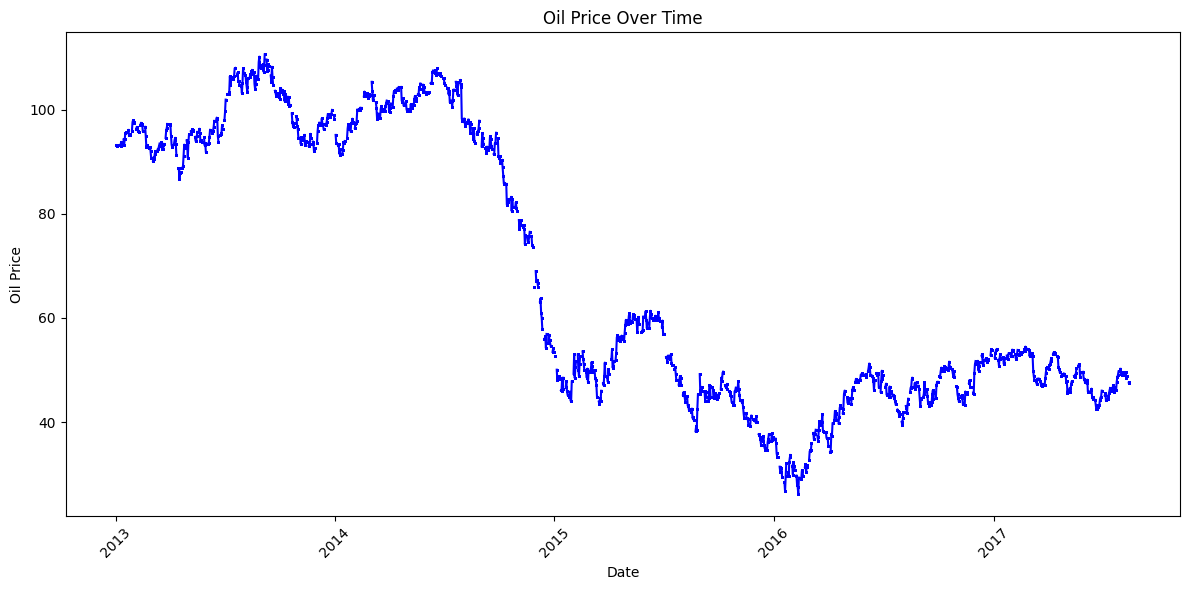

In [30]:
# Visualizing oil_prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['oil_price'], marker='o',
         linestyle='-', color='b', markersize = 1)
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
df['oil_price'].describe().apply("{:.3f}".format)

count    2090286.000
mean          67.906
std           25.666
min           26.190
25%           46.400
50%           53.380
75%           95.780
max          110.620
Name: oil_price, dtype: object

We can use interpolation to fill the missing value in **`oil_price`** column.

(Interpolation method estimates the null values by fitting the known values in a straight line.)

In [32]:
df.oil_price = df.oil_price.interpolate(method = 'linear',
                                        limit_direction = 'both')

In [33]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3034746 entries, 0 to 3054347
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   date          3034746 non-null  datetime64[ns]
 1   store_nbr     3034746 non-null  int64         
 2   family        3034746 non-null  object        
 3   sales         3034746 non-null  float64       
 4   onpromotion   3034746 non-null  int64         
 5   oil_price     3034746 non-null  float64       
 6   city          3034746 non-null  object        
 7   holiday_type  482922 non-null   object        
 8   locale        482922 non-null   object        
 9   transferred   482922 non-null   object        
 10  transactions  2786916 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 277.8+ MB


In [34]:
df.transactions.info()

<class 'pandas.core.series.Series'>
Int64Index: 3034746 entries, 0 to 3054347
Series name: transactions
Non-Null Count    Dtype  
--------------    -----  
2786916 non-null  float64
dtypes: float64(1)
memory usage: 46.3 MB


In [35]:
# Replacing Null Values in transactions column with 0
df["transactions"]= df["transactions"].fillna(0)
df.transactions.info()

<class 'pandas.core.series.Series'>
Int64Index: 3034746 entries, 0 to 3054347
Series name: transactions
Non-Null Count    Dtype  
--------------    -----  
3034746 non-null  float64
dtypes: float64(1)
memory usage: 46.3 MB


In [36]:
# All unique values in a column

print("UNIQUE VALUES ==== \n\n")

for i in ['holiday_type', 'locale', 'transferred']:
  print(f'{i.upper()} == ', list(df[i].unique()), f"\n{'='*100}")

UNIQUE VALUES ==== 


HOLIDAY_TYPE ==  ['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer', 'Bridge'] 
LOCALE ==  ['National', nan, 'Local', 'Regional'] 
TRANSFERRED ==  [False, nan, True] 


***
Null values in *`Holiday`* and *`Locale`* can be filled with `Not Holiday` as both contain the information about whether there was a holiday on that particular date or not.

Regarding *`transferred`* column, sometimes holidays are transferred to some other working day. **True** indicates the holiday was transferred to some other date, and **False** indicates that the holiday was on the same date and no changes took place. We can replace the null values with **False**

***

In [37]:
df['holiday_type'] = df['holiday_type'].fillna("Not Holiday")
df['locale'] = df['locale'].fillna("Not Holiday")
df['transferred'] = df['transferred'].fillna(False)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3034746 entries, 0 to 3054347
Data columns (total 11 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_nbr     int64         
 2   family        object        
 3   sales         float64       
 4   onpromotion   int64         
 5   oil_price     float64       
 6   city          object        
 7   holiday_type  object        
 8   locale        object        
 9   transferred   bool          
 10  transactions  float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 257.6+ MB


***
<a id="eda"></a>
<h3 style="text-align: center; background-color: #e07a5f; border-radius: 5px; padding: 7px 5px 7px 5px; margin: 0px;">EXPLORATORY DATA ANALYSIS</h3>

***


<center style="color:#2a9d8f"><h3>Visualizing Sales over Different Timeframes</h3></center>

***

Visualizing different aspects on multiple timeframes will provide clarity and more insight on hidden trends and patterns.

In [39]:
groupby_date = df[['date', 'sales']]\
               .groupby('date').sum(numeric_only = True)
groupby_date.head()

sales
date                     
2013-01-01    2511.618999
2013-01-02  496092.417944
2013-01-03  361461.231124
2013-01-04  354459.677093
2013-01-05  477350.121229

***
<center style="color:#2a9d8f"><h3>Checking sales by year</h3></center>

***

In [40]:
groupby_year = df[['date', 'sales']]\
               .groupby([df.date.dt.to_period('Y')])\
               .sum(numeric_only = True)
groupby_year.head()

sales
date              
2013  1.418083e+08
2014  2.120652e+08
2015  2.425407e+08
2016  2.963741e+08
2017  1.960506e+08

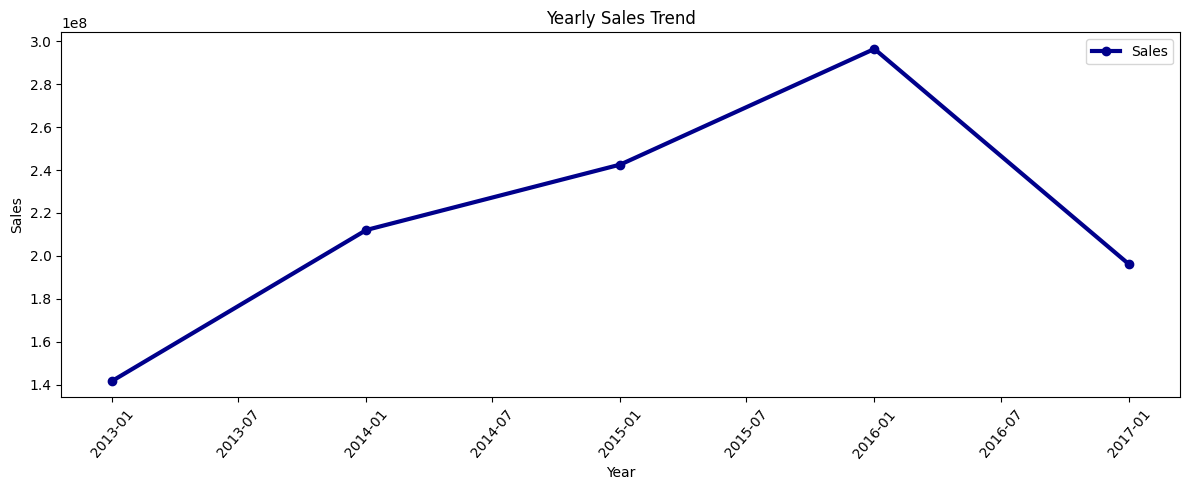

In [41]:
plt.figure(figsize=(12, 5))

# Plotting sales data
plt.plot(groupby_year.index.to_timestamp(), groupby_year["sales"],
         label="Sales",
         color="darkblue",
         marker = 'o',
         linewidth=3)

plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.xticks(rotation=50)
plt.legend()
plt.tight_layout()
plt.show()

***
<center style="color:#2a9d8f"><h3>Checking sales by Month</h3></center>

***

In [42]:
groupby_month = df[['date', 'sales']].groupby([df.date.dt.to_period('M')]).sum(numeric_only = True)
groupby_month.head().apply(lambda series: series.apply(lambda x: "{:.3f}".format(x)))

sales
date                 
2013-01  10327624.737
2013-02   9658959.777
2013-03  11428497.037
2013-04  10993464.738
2013-05  11985564.512

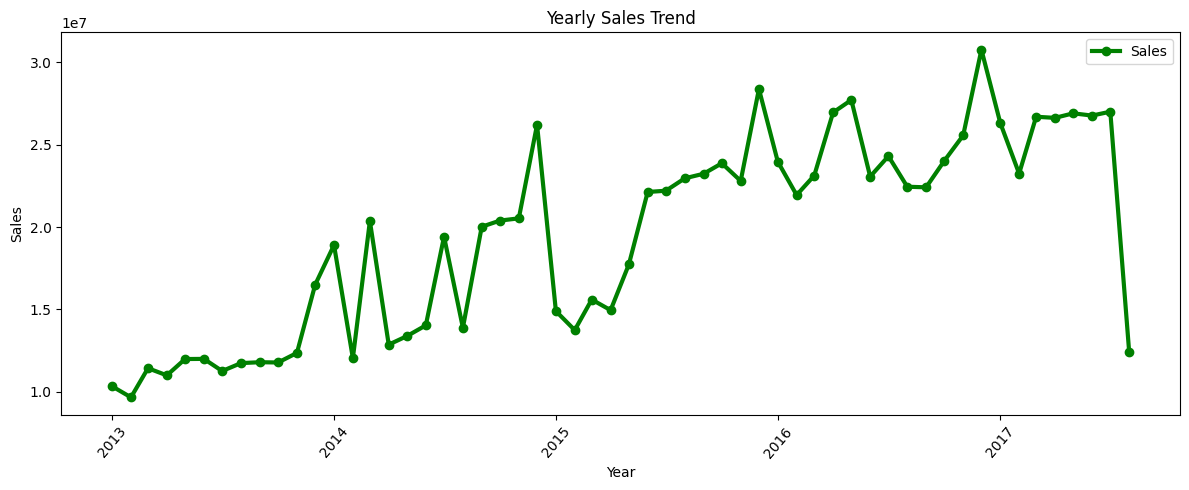

In [43]:
plt.figure(figsize=(12, 5))

# Plotting sales data
plt.plot(groupby_month.index.to_timestamp(), groupby_month["sales"],
         label="Sales",
         color="green",
         marker = 'o',
         linewidth=3)

plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.xticks(rotation=50)
plt.legend()
plt.tight_layout()
plt.show()

***
<center style="color:#2a9d8f"><h3>Checking sales by Day</h3></center>

***

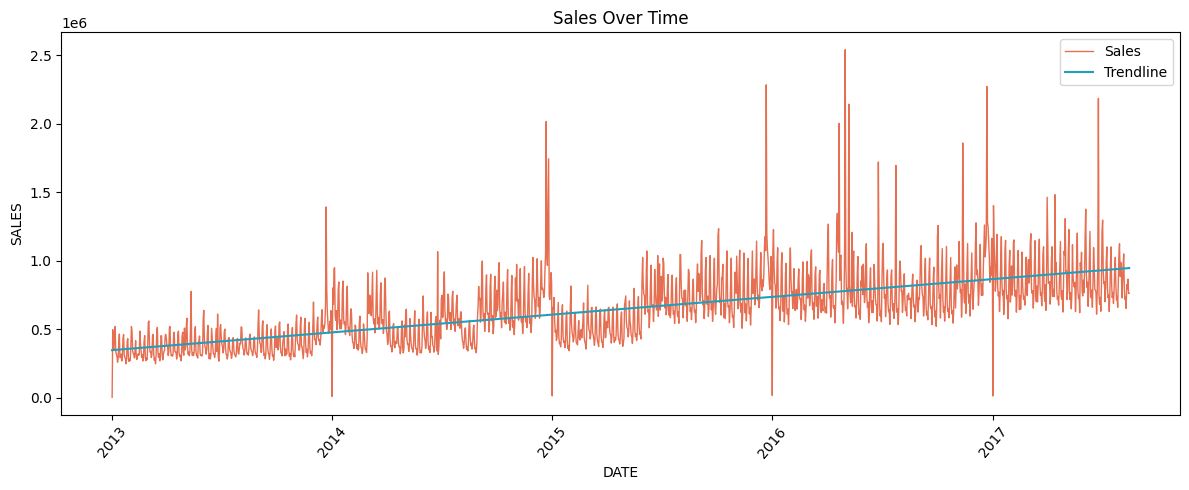

In [44]:
plt.figure(figsize=(12,5))

# Plotting sales data
plt.plot(groupby_date.index, groupby_date["sales"],
         label = "Sales",
         color = "#e76f51",
         linewidth = 1)

# Adding a trendline
x = np.arange(len(groupby_date.index))
y = groupby_date["sales"].values

coefficients = np.polyfit(x, y, 1)
trendline = np.polyval(coefficients, x)

# Plotting the trendline
plt.plot(groupby_date.index, trendline,
         label="Trendline",
         color="#219ebc")

plt.title("Sales Over Time")
plt.xlabel("DATE")
plt.ylabel("SALES")
plt.xticks(rotation=50)
plt.legend()
plt.tight_layout()
plt.show()

Even though the sales seem to be gradually increasing with time, year and month wise sales show a dip in total sales after the year 2016.



***
<center style="color:#2a9d8f"><h3>Box Plot of Sales Column</h3></center>

***

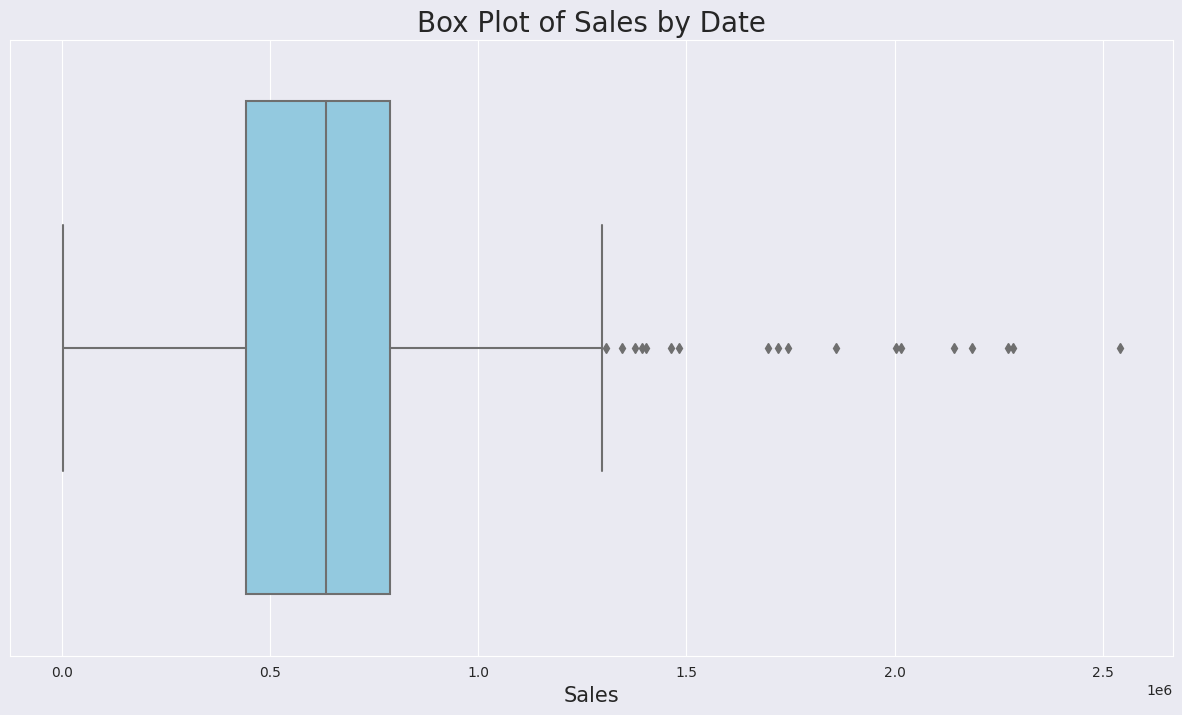

In [45]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(15, 8))
fig.set_facecolor("#eaeaf2")

sns.boxplot(x=groupby_date['sales'], ax=ax, color='skyblue')
ax.set_title('Box Plot of Sales by Date', fontsize=20)
ax.set_xlabel('Sales', fontsize=15)
plt.show()

In [46]:
del groupby_date
del groupby_month
del groupby_year

There are a few outliers in the sales column. This extremely high values can result in range problems when visualizing the plots of different columns.

***
<center style="color:#2a9d8f"><h3>The number of stores in each state</h3></center>

***

Text(0.5, 0, 'Count')

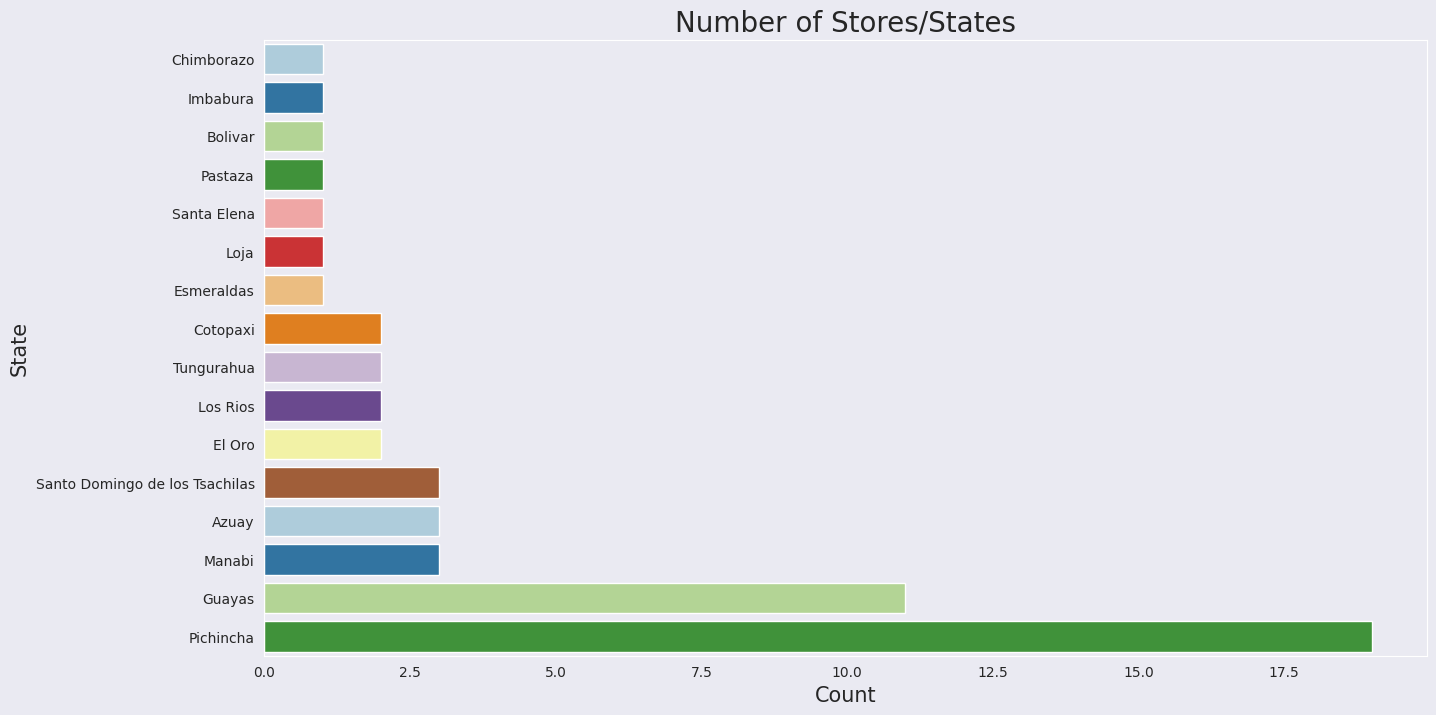

In [47]:
# Visualization of number of stores in each State
sns.set_style("dark")
fig = plt.figure(figsize = (15, 8))
fig.set_facecolor("#eaeaf2")

sns.countplot(data = stores_df, y = 'state',
              order = stores_df.state.value_counts(ascending=True).index,
              palette = 'Paired')

plt.title('Number of Stores/States', fontsize = 20)
plt.ylabel('State', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

***
<center style="color:#2a9d8f"><h3>The number of stores in each city</h3></center>

***

Text(0.5, 0, 'Count')

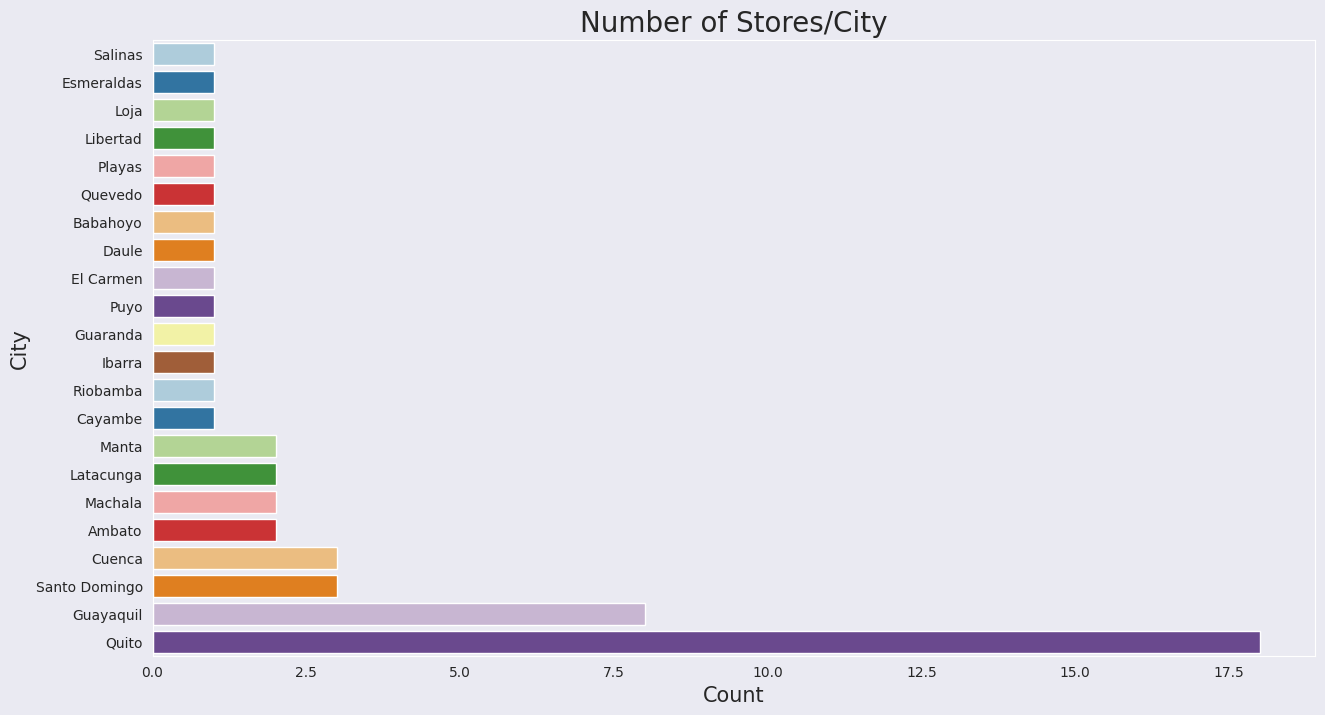

In [48]:
# Visualization of number of stores in each City
sns.set_style("dark")
fig = plt.figure(figsize = (15, 8))
fig.set_facecolor("#eaeaf2")

sns.countplot(data = stores_df, y = 'city',
              order = stores_df.city.value_counts(ascending=True).index,
              palette = 'Paired')

plt.title('Number of Stores/City', fontsize = 20)
plt.ylabel('City', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

The city with the highest number of stores is Quito, which is quite evident, as Quito serves as the capital of Ecuador.

***
<center style="color:#2a9d8f"><h3>Total Sales made by Different Stores</h3></center>

***

Text(0.5, 1.0, 'Total Sales by Stores')

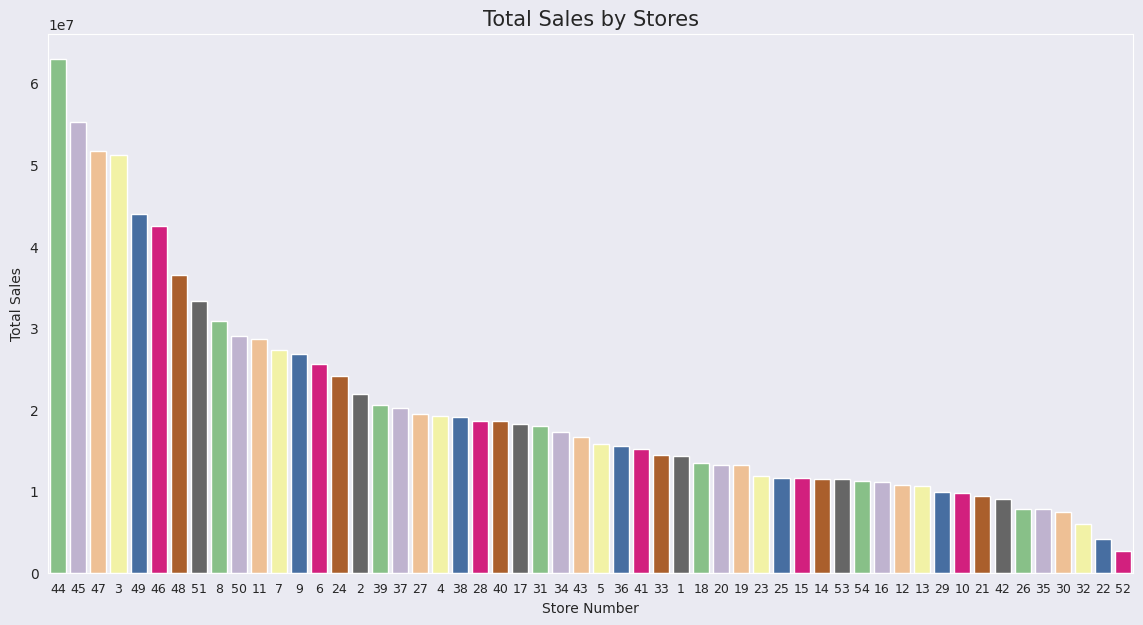

In [49]:
grouped_sales_by_store_num=df.groupby('store_nbr')\
                    .sum('sales').reset_index()\
                    .sort_values(by = 'sales', ascending = False)

# Plotting the bar chart
sns.set_style("dark")
fig = plt.figure(figsize = (14,7))
fig.set_facecolor("#eaeaf2")

sns.barplot(x = 'store_nbr', y = 'sales',
            data = grouped_sales_by_store_num,
            order = grouped_sales_by_store_num['store_nbr'],
            palette = 'Accent')
plt.xlabel("Store Number", fontsize = '10')
plt.ylabel("Total Sales", fontsize = '10')
plt.xticks(fontsize = 9)
plt.title('Total Sales by Stores', fontsize = '15')

In [50]:
store_num_list = [44, 45, 47, 3, 49, 46, 48, 51, 8, 50, 11, 7, 9]
stores_df.loc[stores_df['store_nbr'].isin(store_num_list), 'city']

2         Quito
6         Quito
7         Quito
8         Quito
10      Cayambe
43        Quito
44        Quito
45        Quito
46        Quito
47        Quito
48        Quito
49       Ambato
50    Guayaquil
Name: city, dtype: object

Majority of the stores with the highest sales belong to the city of Quito (the capital of Ecuador). Cities can be an important factors in decision making due to different factors like urban population, above average income, etc.

***
<center style="color:#2a9d8f"><h3>Product Family vs Sales</h3></center>

***

Text(0.5, 1.0, 'Total Sales by Product Family')

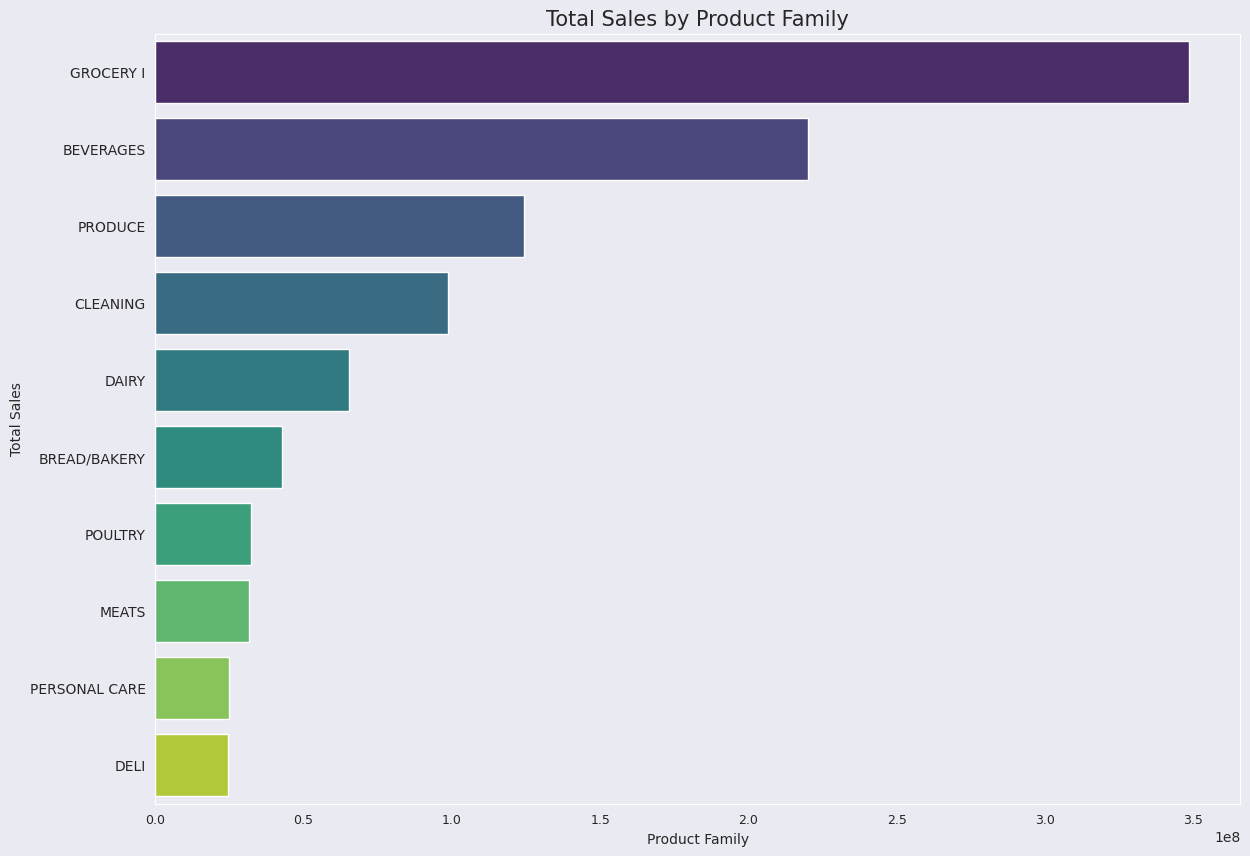

In [51]:
grouped_sales_by_family = df.groupby('family').sum(numeric_only = True)

# Plotting the bar chart
sns.set_style("dark")
fig = plt.figure(figsize = (14,10))
fig.set_facecolor("#eaeaf2")

grouped_sales_by_family.sort_values(by='sales',
                                    ascending=False,
                                    inplace = True)

sns.barplot(x = grouped_sales_by_family.sales[:10],
            y = grouped_sales_by_family.index[:10],
            palette = 'viridis')

plt.xlabel("Product Family", fontsize = '10')
plt.ylabel("Total Sales", fontsize = '10')
plt.xticks(fontsize = 9)
plt.title('Total Sales by Product Family', fontsize = '15')

**`Grocery`** Products generate the highest sales followed by **`Beverages`** and **`Produce`**

***
<center style="color:#2a9d8f"><h3>Distribution of Sales Column</h3></center>

***

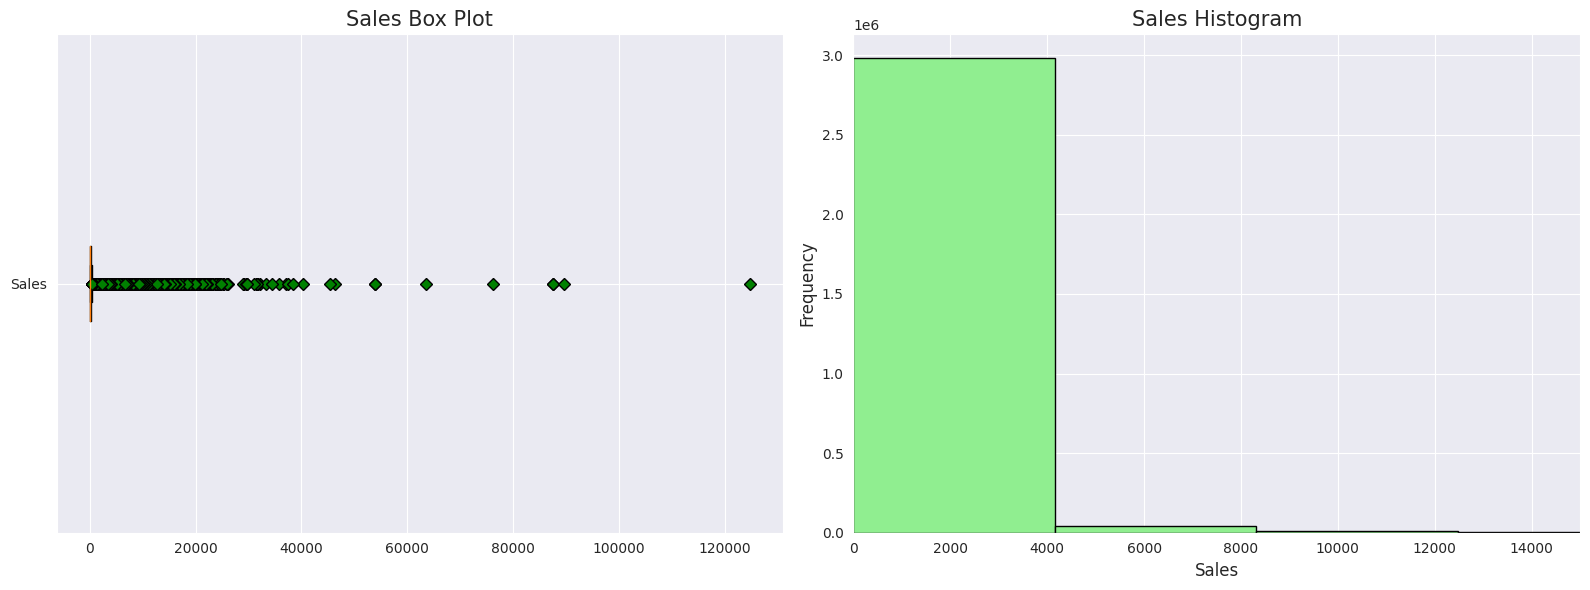

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting the histogram
axes[1].hist(df['sales'], bins=30,
             color='lightgreen', edgecolor='black')

axes[1].set_title('Sales Histogram', fontsize=15)
axes[1].set_xlabel('Sales', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(True)
axes[1].set_xlim(0, 15000)

# Plotting the box plot
axes[0].boxplot(df['sales'], vert = False,
                flierprops = dict(markerfacecolor='g',
                marker='D'))

axes[0].set_title('Sales Box Plot', fontsize=15)
axes[0].set_yticklabels(['Sales'])
axes[0].grid(True)

plt.tight_layout()
plt.show()

The distribution of sales is right-skewed (positively skewed). Box plot indicates presence of extreme values in the dataset.

***
<center style="color:#2a9d8f"><h3>Distribution of Oil Price Column</h3></center>

***

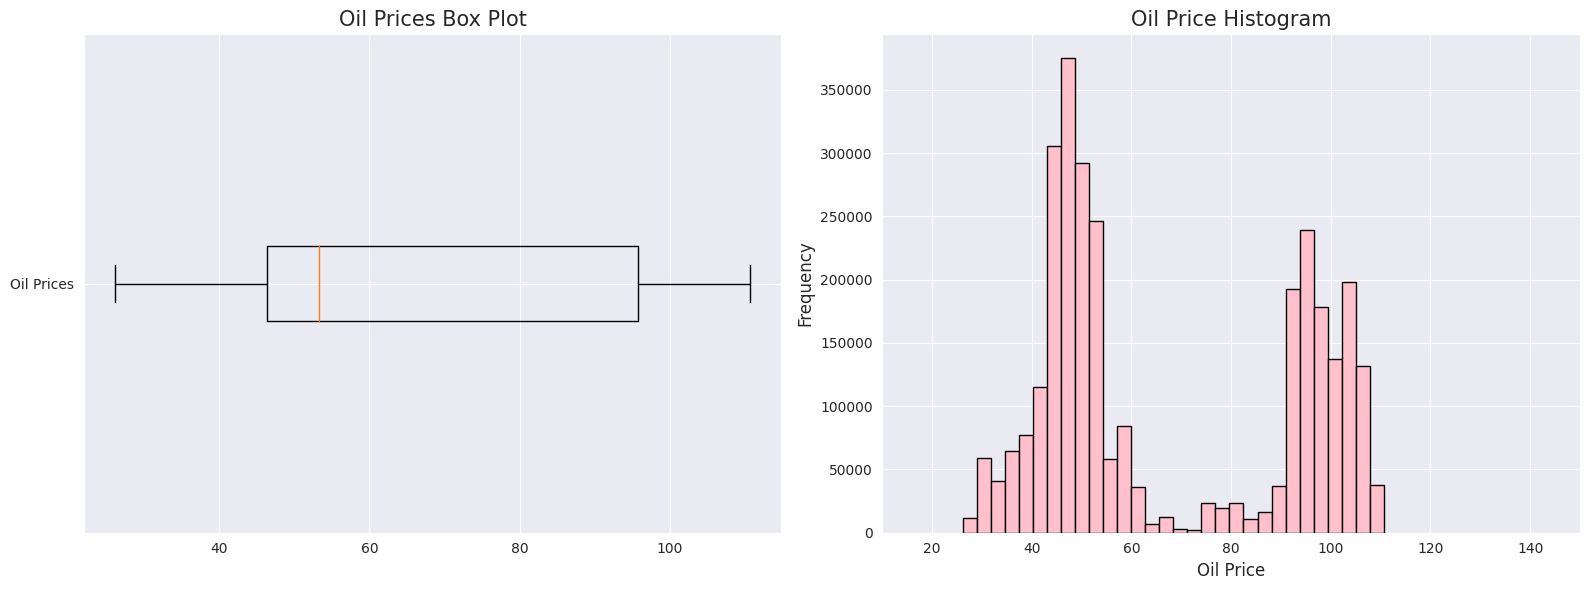

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting the histogram
axes[1].hist(df['oil_price'], bins=30,
             color='pink', edgecolor='black')

axes[1].set_title('Oil Price Histogram', fontsize=15)
axes[1].set_xlabel('Oil Price', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(True)
axes[1].set_xlim(10, 150)

# Plotting the box plot
axes[0].boxplot(df['oil_price'], vert = False,
                flierprops = dict(markerfacecolor='g',
                marker='D'))

axes[0].set_title('Oil Prices Box Plot', fontsize=15)
axes[0].set_yticklabels(['Oil Prices'])
axes[0].grid(True)

plt.tight_layout()
plt.show()

There seem to be no outliers for **`Oil Price`** column and the distribution peaks twice with one peak at around 50 and another at around 90.

It is a bimodal distribution either implying missing data or presence of two separate population.

***
<center style="color:#2a9d8f"><h3>Relationship between Sales and Oil Prices</h3></center>

***

Text(0, 0.5, 'Total Sales')

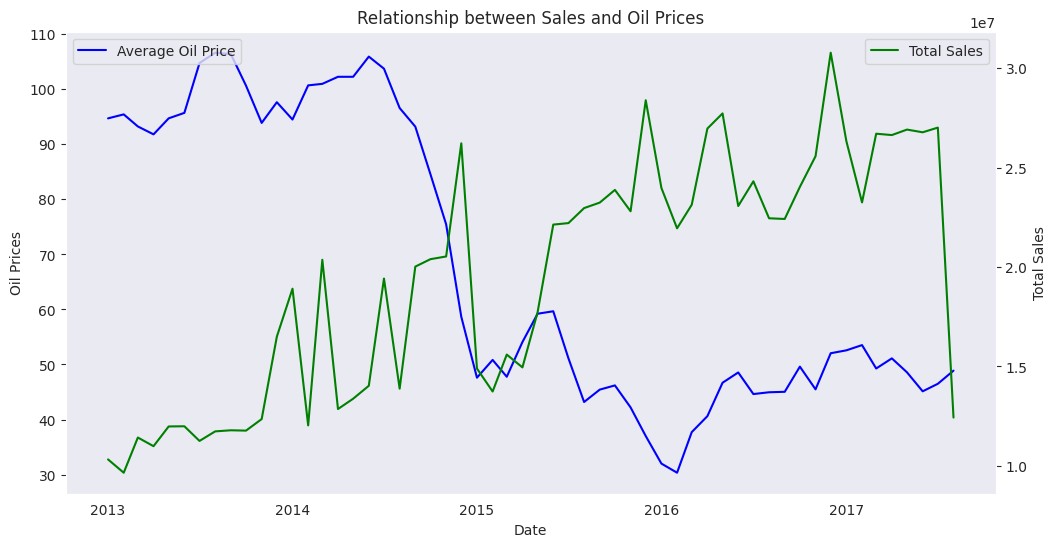

In [54]:
# Grouping the data
grouped_data = df.groupby(df['date']\
                          .dt.to_period('M'))\
                          .agg({'sales': 'sum', 'oil_price': 'mean'})\
                          .reset_index()

grouped_data['date'] = grouped_data['date'].dt.to_timestamp()

# Plotting the dual line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='date', y='oil_price', label='Average Oil Price', color='blue')
plt.legend(loc = 2)
plt.title("Relationship between Sales and Oil Prices")
plt.xlabel("Date")
plt.ylabel("Oil Prices")
ax2 = plt.twinx()
sns.lineplot(data=grouped_data, x='date', y='sales', label='Total Sales', color='green', ax = ax2)

ax2.set_ylabel("Total Sales")

As oil prices decreased, sales have gradually increased over time. Ecuador economy relies heavily on oil prices. It is visible that there is an inverse relationship between Sales and Oil Price.

***
<center style="color:#2a9d8f"><h3>Visualizing relation between number of transactions and sales value.</h3></center>

***


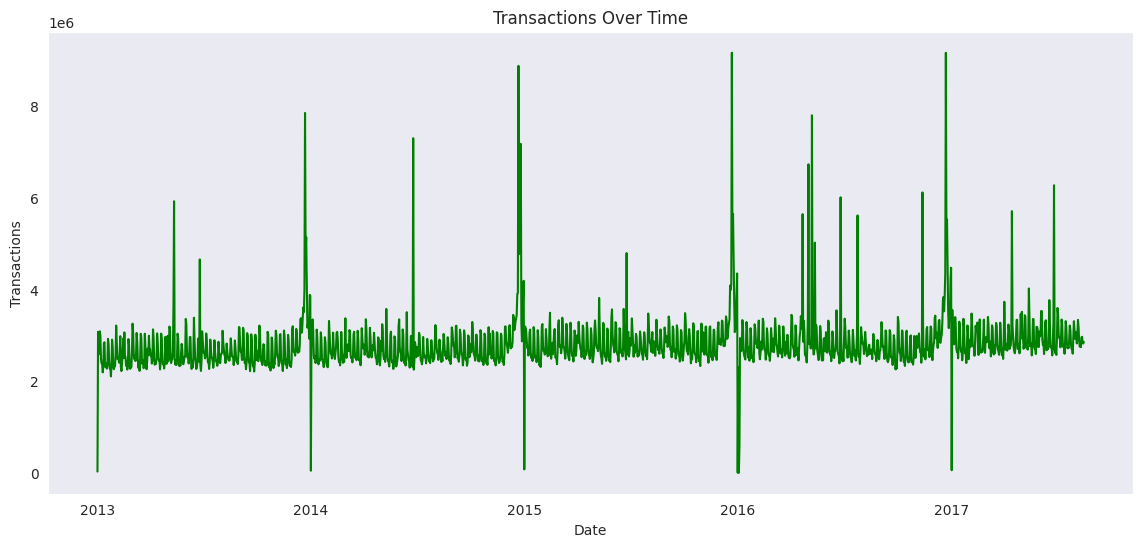

In [55]:
#Grouping data by transactions
grouped_txn = df.groupby('date').agg({'sales': 'sum', 'transactions': 'sum'}).reset_index()

# Plotting lineplot
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='transactions', data = grouped_txn, color = "green")
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.show()

As expected, there is a significant correlation between *`transactions`* and *`sales`*

***
<center style="color:#2a9d8f"><h3>Total Sales by Holiday Type</h3></center>

***

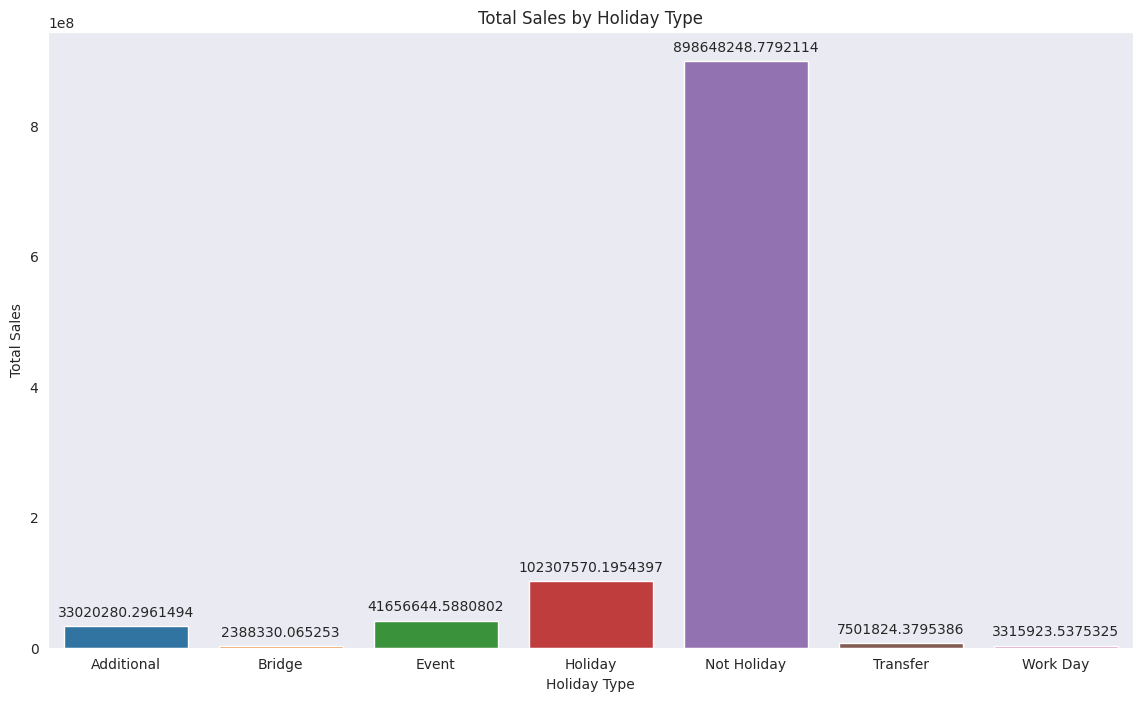

In [56]:
# Grouping data
grouped_by_holiday_df = df.groupby('holiday_type')['sales'].sum().reset_index()

# Bar Plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='holiday_type', y='sales', data=grouped_by_holiday_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Total Sales by Holiday Type')
plt.xlabel('Holiday Type')
plt.ylabel('Total Sales')
plt.show()

Majority of the sales has happened on type **Not Holiday**. Since this was a replacement value for null values in the column, it is difficult to extract any insight on this column.

***
<center style="color:#2a9d8f"><h3>Analyzing Time-Series Components by Decomposition</h3></center>

***

To analyze our data, we will decompose our time-series data into different individual components:
1. **Trend** (Overall trend of the data)
2. **Seasonality** (Fluctuations in data with respect to different seasons (short timeframes))
3. **Residual**

It is suitable to perform the analysis by grouping the data on a week basis as day-wise graphs will be too cluttered to be able to recognize any patterns and details.

In [57]:
# Importing the statsmodel library
import statsmodels.api as sm

***
### Univariate Analysis
***
Now we will discard all other columns of importance and simply create a time-series model based on `Date` and `Sales` column.

In [58]:
simple_df = df.groupby('date')['sales'].sum().reset_index()
simple_df.head()

date          sales
0 2013-01-01    2511.618999
1 2013-01-02  496092.417944
2 2013-01-03  361461.231124
3 2013-01-04  354459.677093
4 2013-01-05  477350.121229

In [59]:
simple_df.set_index(simple_df.date, inplace = True)
simple_df.drop('date', axis = 1, inplace = True)
simple_df.head()

sales
date                     
2013-01-01    2511.618999
2013-01-02  496092.417944
2013-01-03  361461.231124
2013-01-04  354459.677093
2013-01-05  477350.121229

Text(0, 0.5, 'Sales')

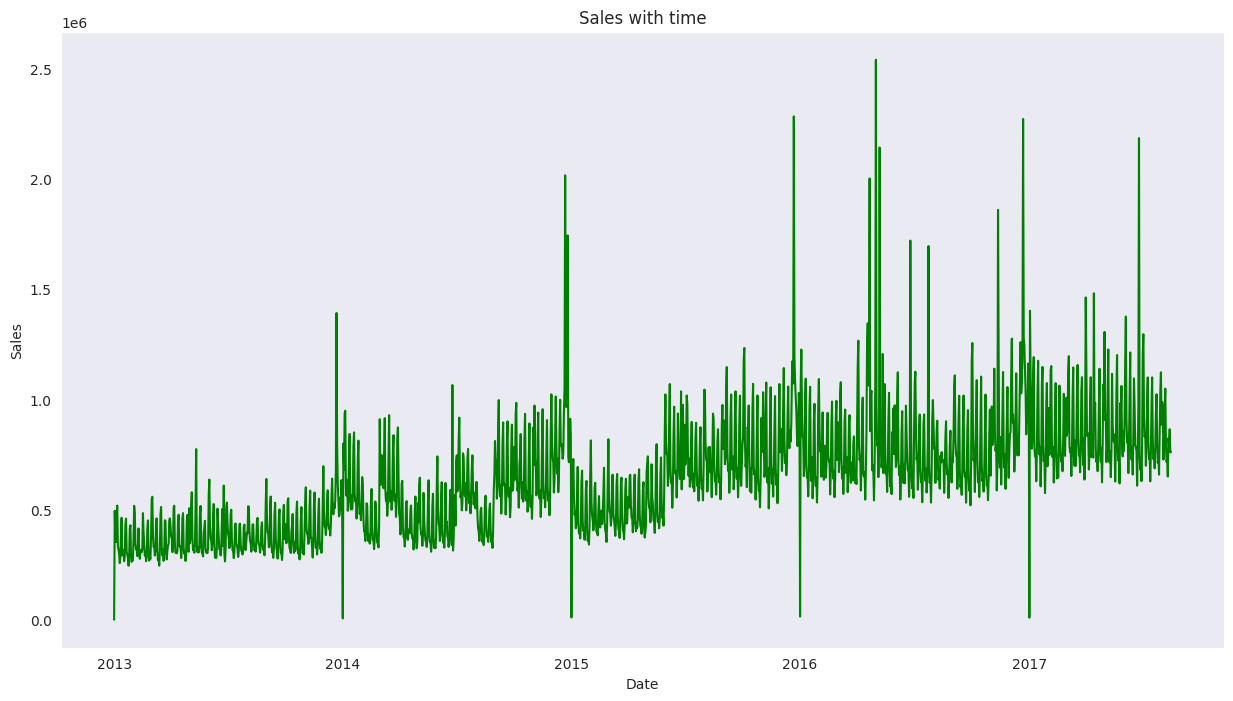

In [60]:
plt.figure(figsize = (15, 8))

plt.plot(simple_df, label = "sales", color = "green")
plt.title("Sales with time")
plt.xlabel("Date")
plt.ylabel("Sales")


***
<center style="color:#2a9d8f"><h3>Decomposing the data into different components:</h3></center>

***

In [61]:
decomposition = sm.tsa.seasonal_decompose(simple_df, model = 'multiplicative', period = 365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

Text(0, 0.5, 'Residual')

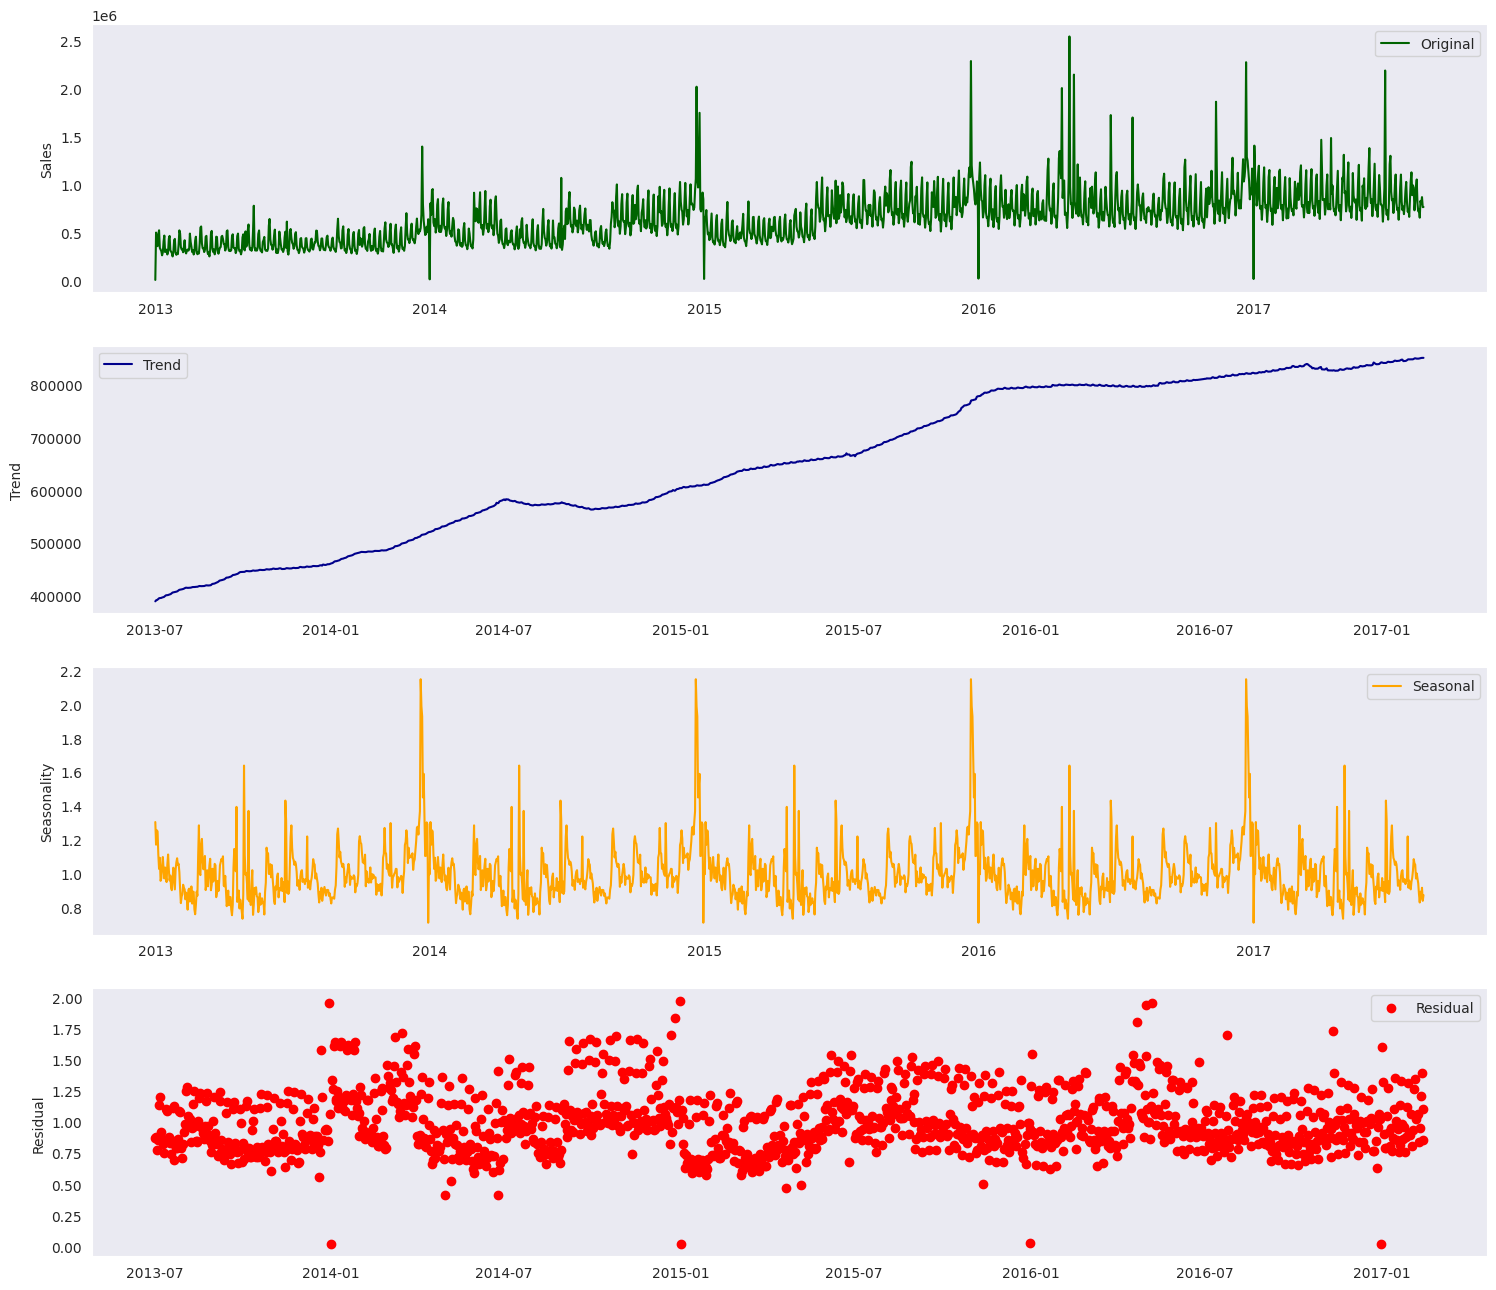

In [62]:
plt.figure(figsize=(18, 16))

plt.subplot(411)
plt.plot(simple_df, label='Original', color = 'darkgreen')
plt.legend(loc='best')
plt.ylabel("Sales")

plt.subplot(412)
plt.plot(trend, label='Trend', color = 'darkblue')
plt.legend(loc='best')
plt.ylabel("Trend")

plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color = 'orange')
plt.legend(loc='best')
plt.ylabel("Seasonality")

plt.subplot(414)
plt.scatter(residual.index, residual, label='Residual', marker = 'o', color = 'red')
plt.legend(loc='best')
plt.ylabel("Residual")

Our data has an increasing trend.
The data also has some seasonality where Sales steadily increases from the start till the very end and at the end of the year, there is a huge increase in sales and a dip afterwards of the same magnitude.


***
<center style="color:#2a9d8f"><h3>Data Stationarity</h3></center>

***

To model time series data, the data should be stationary. Components of
 stationary data such as mean, variance, covariance, and standard deviation do not vary with time. Stationary data results in effective and precise modelling.

There are multiple tests to determine stationarity but most frameworks handle it internally. It can be approximated by visualizations and statistical tests can be used as well.

<h4 style="color:#e07a5f">Augmented Dickey-Fuller test</h4>
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. It tests the null hypothesis that $\alpha$=1 in the following model equation. alpha is the coefficient of the first lag on Y.

1. **Null Hypothesis ($H_o$)**: Suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
2. **Alternate Hypothesis ($H_1$)**: Suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

- $\text{p-value} > 0.05$: Failure to reject the Null Hypothesis.
- $\text{p-value} <= 0.05$: Reject the Null Hypothesis and Accept the Alternate Hypothesis.


In [63]:
from statsmodels.tsa.stattools import adfuller

In [64]:
result = adfuller(simple_df)

print('ADF Statistic:', result[0], '\n')
print('p-value:', result[1], '\n')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

if result[1] <= 0.05:
    print("Reject the null hypothesis (H0): Data is stationary")
else:
    print("\nFail to reject the null hypothesis (H0): Data is non-stationary")

ADF Statistic: -2.713989551393036 

p-value: 0.07164859284532099 

Critical Values:
   1%: -3.4342930672797065
   5%: -2.8632816397229064
   10%: -2.567697207194407

Fail to reject the null hypothesis (H0): Data is non-stationary


Our data is already stationary so there is no need for differencing. Although, it is visible from the below differencing operation that how differencing affects the plot of the graph.

Text(0, 0.5, 'Sales')

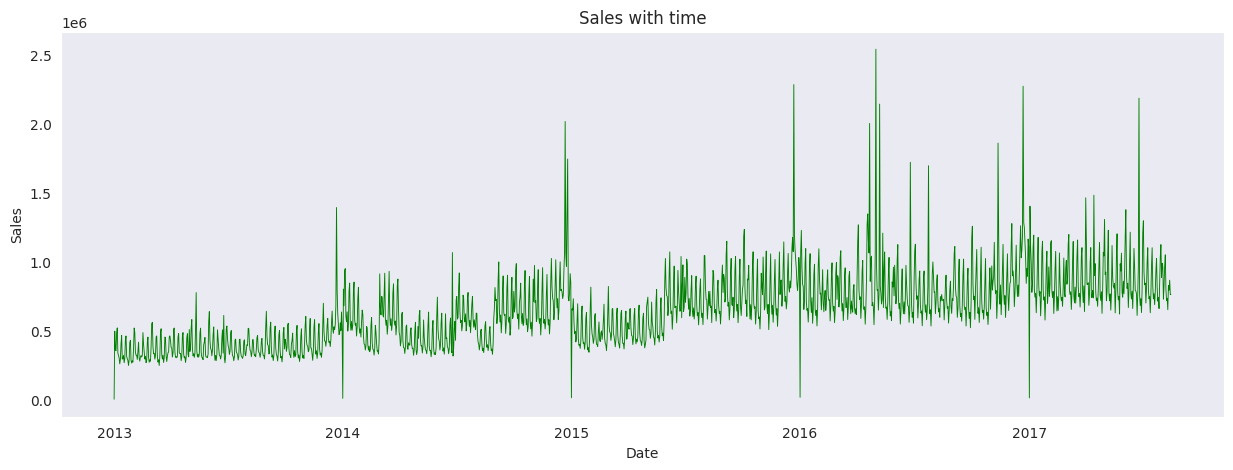

In [65]:
plt.figure(figsize = (15, 5))

plt.plot(simple_df['sales'], label = "sales", color = "green", linewidth = 0.65)
plt.title("Sales with time")
plt.xlabel("Date")
plt.ylabel("Sales")

In [66]:
# First-order differencing
simple_df['Sales First Difference'] = simple_df['sales'] - simple_df['sales'].shift(1)

result = adfuller(simple_df['Sales First Difference'].dropna())

print('ADF Statistic:', result[0], '\n')
print('p-value:', result[1], '\n')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

if result[1] <= 0.05:
    print("Reject the null hypothesis (H0): Data is stationary")
else:
    print("\nFail to reject the null hypothesis (H0): Data is non-stationary")

ADF Statistic: -10.522605930423909 

p-value: 9.596293655491417e-19 

Critical Values:
   1%: -3.4343026006557427
   5%: -2.863285847799246
   10%: -2.5676994479374455
Reject the null hypothesis (H0): Data is stationary


Text(0, 0.5, 'Sales First Difference')

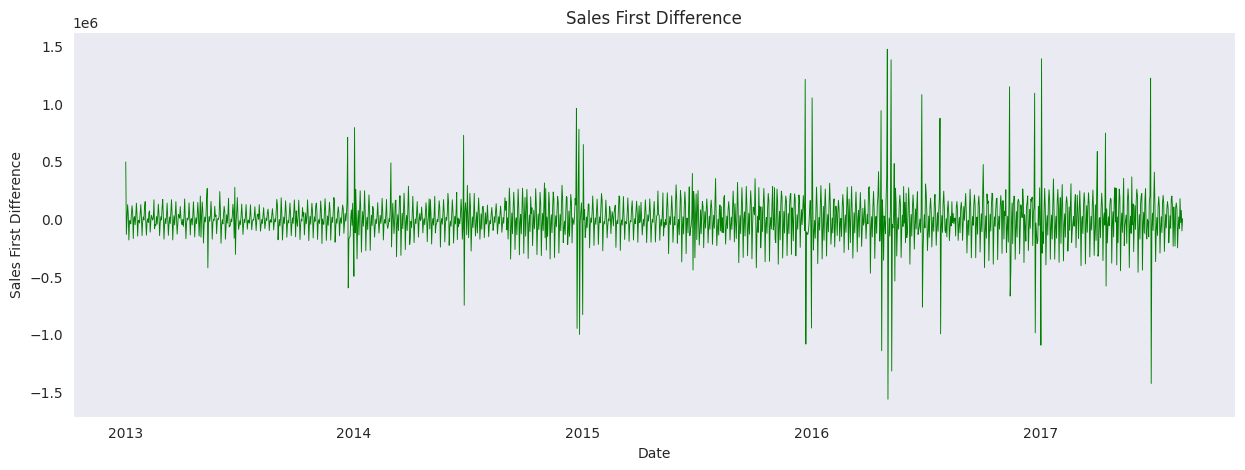

In [67]:
plt.figure(figsize = (15, 5))

plt.plot(simple_df['Sales First Difference'], label = "sales", color = "green", linewidth = 0.65)
plt.title("Sales First Difference")
plt.xlabel("Date")
plt.ylabel("Sales First Difference")

Our data becomes stationarity just after single differencing operation.
Now we know the value of `d` for our time-series model. This can be confirmed visually by looking at the graph above, although it is recommended to draw conclusions only from a statistical test.

In [68]:
print("Standard deviation before Differencing: ",simple_df['sales'].std())
print("\nStandard deviation after Differencing: ", simple_df['Sales First Difference'].std())

Standard deviation before Differencing:  261015.57411979802

Standard deviation after Differencing:  209609.4442794885


Generally it is observed that the standard deviation decreases after applying a much needed differencing. And the same can be observed above.


***
<center style="color:#2a9d8f"><h3>Plotting Auto-Correlation Chart (ACF) and Partial Correlation Chart(PACF)</h3></center>

***

***
#### Before Differencing:

***
**Auto-Correlation Function (ACF)** and **Partial Auto-Correlation Function (PACF)** plots


In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

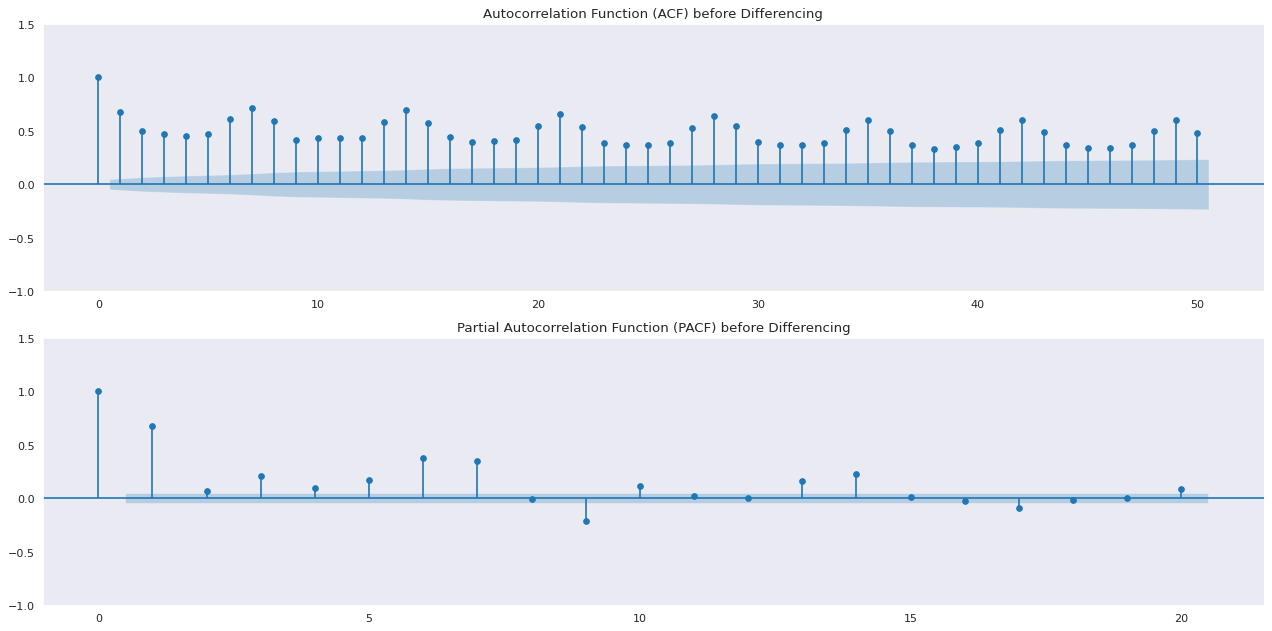

In [70]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), dpi=80)

plot_acf(simple_df['sales'], ax=ax1, lags=50)
ax1.set_title('Autocorrelation Function (ACF) before Differencing')
ax1.set_ylim(-1, 1.5)

plot_pacf(simple_df['sales'], ax=ax2, lags=20)
ax2.set_title('Partial Autocorrelation Function (PACF) before Differencing')
ax2.set_ylim(-1, 1.5)

plt.tight_layout()

From the ACF Chart, it is clear that almost all the lags have a strong correlation but the strongest lags occur at 7 and 14.

Similarly, from the PACF, the strongest lag occur at 1, 3, 6 and 7.


***
#### After Differencing:

***
**Auto-Correlation Function (ACF)** and **Partial Auto-Correlation Function (PACF)** plots



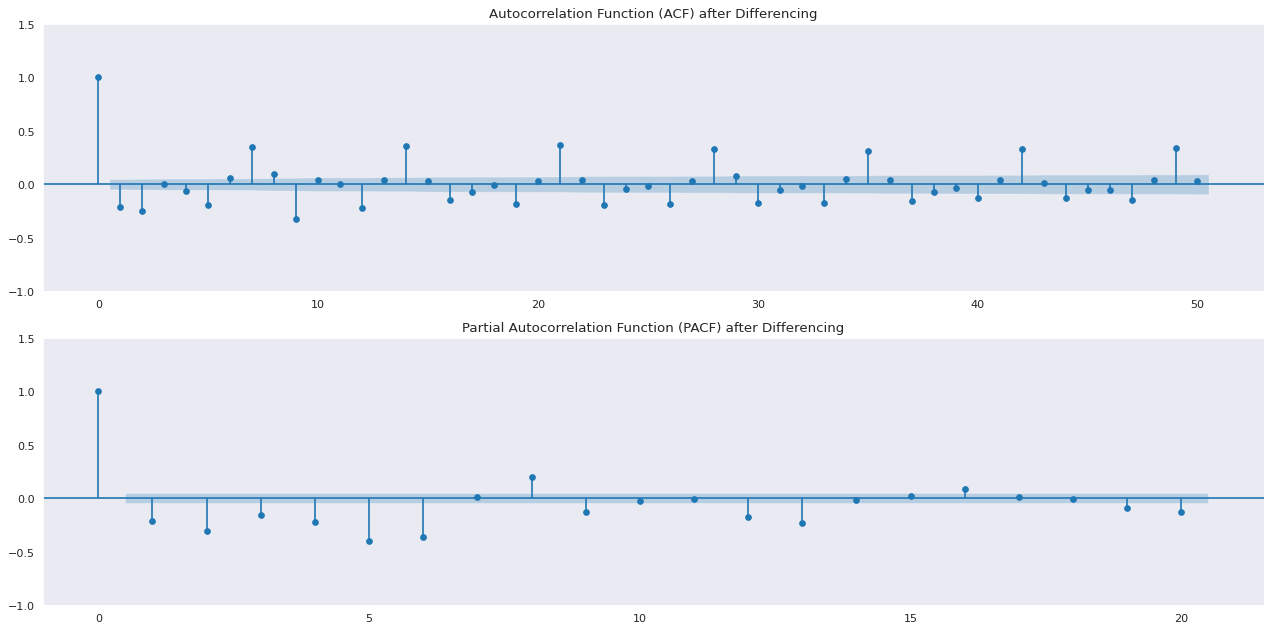

In [71]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), dpi=80)

plot_acf(simple_df["Sales First Difference"].dropna(), ax=ax1, lags=50)
ax1.set_title('Autocorrelation Function (ACF) after Differencing')
ax1.set_ylim(-1, 1.5)

plot_pacf(simple_df['Sales First Difference'].dropna(), ax=ax2, lags=20)
ax2.set_title('Partial Autocorrelation Function (PACF) after Differencing')
ax2.set_ylim(-1, 1.5)

plt.tight_layout()

From the ACF Chart, it is clear that the strongest lags occur at 2, 5 and 7.

Similarly, from the PACF, the strongest lag occur at 2, 5 and 6.


Let's create simple ARIMA model using combination of these above values and see which performs best.

In [72]:
simple_df.drop('Sales First Difference', axis = 1, inplace = True)

***
<a id='univar'></a>
<h3 style="text-align: center; background-color: #e07a5f; border-radius: 5px; padding: 7px 5px 7px 5px; margin: 0px;">UNIVARIATE MODELLING</h3>

***

The next couple of models that we will be creating will be univariate time series models. Univariate means that these models only take into account the time and the target column value. (Date and Sales in this case).

For using other columns for predicting our sales, we can take traditional machine learning approaches like Decision Tree, Boosting Ensemble, etc.

In [73]:
# Installing pmdarima
!pip install pmdarima --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00


In [74]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split # This split does not shuffle the data

In [75]:
simple_df.head()

sales
date                     
2013-01-01    2511.618999
2013-01-02  496092.417944
2013-01-03  361461.231124
2013-01-04  354459.677093
2013-01-05  477350.121229

In [76]:
# Split data into train and test sets
train, test = train_test_split(simple_df, train_size=0.8)

In [77]:
train.head()

sales
date                     
2013-01-01    2511.618999
2013-01-02  496092.417944
2013-01-03  361461.231124
2013-01-04  354459.677093
2013-01-05  477350.121229

In [78]:
test.head()

sales
date                     
2016-09-12  678776.459126
2016-09-13  603427.946974
2016-09-14  624262.071976
2016-09-15  568324.812986
2016-09-16  691912.601466


***
<center style="color:#2a9d8f"><h3>Creating an ARIMA Model</h3></center>

***

ARIMA stands for Autoregressive Integrated Moving Average, each of which technique contributes to the final forecast. It consists of the following components:

1. **Autoregressive (AR)**:
   The term autoregression indicates that it is a regression of the variable against itself. That is, we use lagged values of the target variable as our input variables to forecast values for the future.

2. **Integrated (I)**:
   Integrated represents any differencing that has to be applied in order to make the data stationary.

3. **Moving Average (MA)**:
   Moving average models uses past forecast errors rather than past values in a regression-like model to forecast future values.

Arima models are not used where the data has seasonality but we are going to use it as a starting point for our time-series analysis.

We will try different combination for *`p`* and *`q`* values found through EDA.

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import itertools

In [80]:
def calculate_metrics(actual, predicted):
    """
    Calculate evaluation metrics (MAE, MSE, RMSE, RMSLE) given actual and predicted values.

    Parameters:
        actual (pd.DataFrame or pd.Series): Actual values.
        predicted (pd.DataFrame or pd.Series): Predicted values.

    Returns:
        pd.DataFrame: DataFrame containing evaluation metrics.
    """

    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    rmsle = mean_squared_log_error(actual, predicted, squared = False)

    metrics_data = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'RMSLE': rmsle
    }

    return metrics_data

The following code does an exhaustive search for optimal parameters and returns the summary of the best performing model.

In [81]:
# Setting to ignore warnings
warnings.filterwarnings("ignore")

# Defining the possible values for p, d, and q
p_values = [2, 5]
d_values = [0, 1]
q_values = [2, 5, 7]

best_arima_model = None
best_arima_aic = float("inf")
data_arima_list = []

for p, d, q in itertools.product(p_values, d_values, q_values):

    # Create the ARIMA model with specific p, d, and q values
    arima_model = sm.tsa.ARIMA(train, order=(p, d, q))

    try:
        results = arima_model.fit()

        # Predict using the ARIMA model
        predicted = results.predict(start = len(train), end = len(simple_df)-1)

        # Calculate AIC (Akaike Information Criterion)
        aic = results.aic

        # Calculate Evaluation Metrics and append into DataFrame
        metrics_data = calculate_metrics(test, predicted)
        metrics_data.update({"Model": f"ARIMA {p}, {d}, {q}", "AIC": aic})
        data_arima_list.append(metrics_data)

        # Check if the current model has a lower AIC than the best model found so far
        if aic < best_arima_aic:
            best_arima_aic = aic
            best_arima_model = results

            print(f"Found better model - p:{p}, d:{d}, q:{q}, AIC:{aic}")

    except Exception as e:
        # Handle any exceptions that might occur during model fitting
        print(f"Error occurred for p:{p}, d:{d}, q:{q}: {e}")

# Creating the dataframe of evaluation metrics
results_arima_df = pd.DataFrame(data_arima_list, columns = ['Model', 'MAE', 'MSE', 'RMSE', 'RMSLE', 'AIC'])

# Print the summary of the best model
print("\n\n\n\n")
if best_arima_model:
    print(best_arima_model.summary())
else:
    print("No valid model found.")

Found better model - p:2, d:0, q:2, AIC:36158.730637714216
Found better model - p:2, d:0, q:5, AIC:36157.291463975605
Found better model - p:2, d:0, q:7, AIC:36060.4952975964
Found better model - p:2, d:1, q:5, AIC:35899.411517016546
Found better model - p:5, d:0, q:5, AIC:35765.91850033884
Found better model - p:5, d:0, q:7, AIC:35746.70237378107
Found better model - p:5, d:1, q:5, AIC:35697.42131722215
Found better model - p:5, d:1, q:7, AIC:35679.18422225342





                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1347
Model:                 ARIMA(5, 1, 7)   Log Likelihood              -17826.592
Date:                Sun, 19 Nov 2023   AIC                          35679.184
Time:                        12:04:13   BIC                          35746.848
Sample:                             0   HQIC                         35704.528
                               - 1347                  

`Note:` The model summary shows **SARIMAX Results** which might be confusing to interpret. When using pmdarima, it uses the SARIMAX model but when the seasonal parameters are set to zero, it is actually an ARIMA Model which is the same thing happening here.

In [82]:
# Different values of evaluation metrics of our ARIMA Models
results_arima_df

Model            MAE           MSE           RMSE     RMSLE  \
0   ARIMA 2, 0, 2  204626.715863  8.125057e+10  285044.851675  0.379227   
1   ARIMA 2, 0, 5  212292.315071  8.505831e+10  291647.578319  0.387811   
2   ARIMA 2, 0, 7  254015.076941  1.076291e+11  328068.669309  0.437311   
3   ARIMA 2, 1, 2  153425.212650  5.407666e+10  232543.879265  0.323804   
4   ARIMA 2, 1, 5  142873.070188  4.783649e+10  218715.550247  0.312914   
5   ARIMA 2, 1, 7  151176.182152  5.164481e+10  227254.935751  0.320173   
6   ARIMA 5, 0, 2  209604.753679  8.380320e+10  289487.817027  0.385344   
7   ARIMA 5, 0, 5  132663.937769  4.462444e+10  211244.964589  0.308452   
8   ARIMA 5, 0, 7  135318.590412  4.493671e+10  211982.808876  0.311486   
9   ARIMA 5, 1, 2  137822.421530  4.626441e+10  215091.625773  0.309779   
10  ARIMA 5, 1, 5  130689.870855  4.257125e+10  206328.013564  0.304471   
11  ARIMA 5, 1, 7  128670.451463  4.147424e+10  203652.261011  0.304170   

             AIC  
0   36158.730638  
1   36157.291464  
2   36060.495298  
3   36128.346948  
4   35899.411517  
5   35949.190325  
6   36153.997596  
7   35765.918500  
8   35746.702374  
9   35883.094062  
10  35697.421317  
11  35679.184222

Since our best model is already stored in `best_arima_model`, we don't need to fit it once again.

Creating a Metrics Dataframe to track the performance of different models.

In [83]:
# Sorting the existing dataframe
results_arima_df.sort_values(by = 'RMSLE', inplace = True)

# Creating a metrics df to track performance
metrics_df = results_arima_df.head(1)
metrics_df.reset_index(inplace = True, drop = True)
metrics_df

Model            MAE           MSE           RMSE    RMSLE  \
0  ARIMA 5, 1, 7  128670.451463  4.147424e+10  203652.261011  0.30417   

            AIC  
0  35679.184222

In [84]:
# Predict using the best SARIMA model
predicted = best_arima_model.predict(start = len(train), end = len(simple_df)-1)

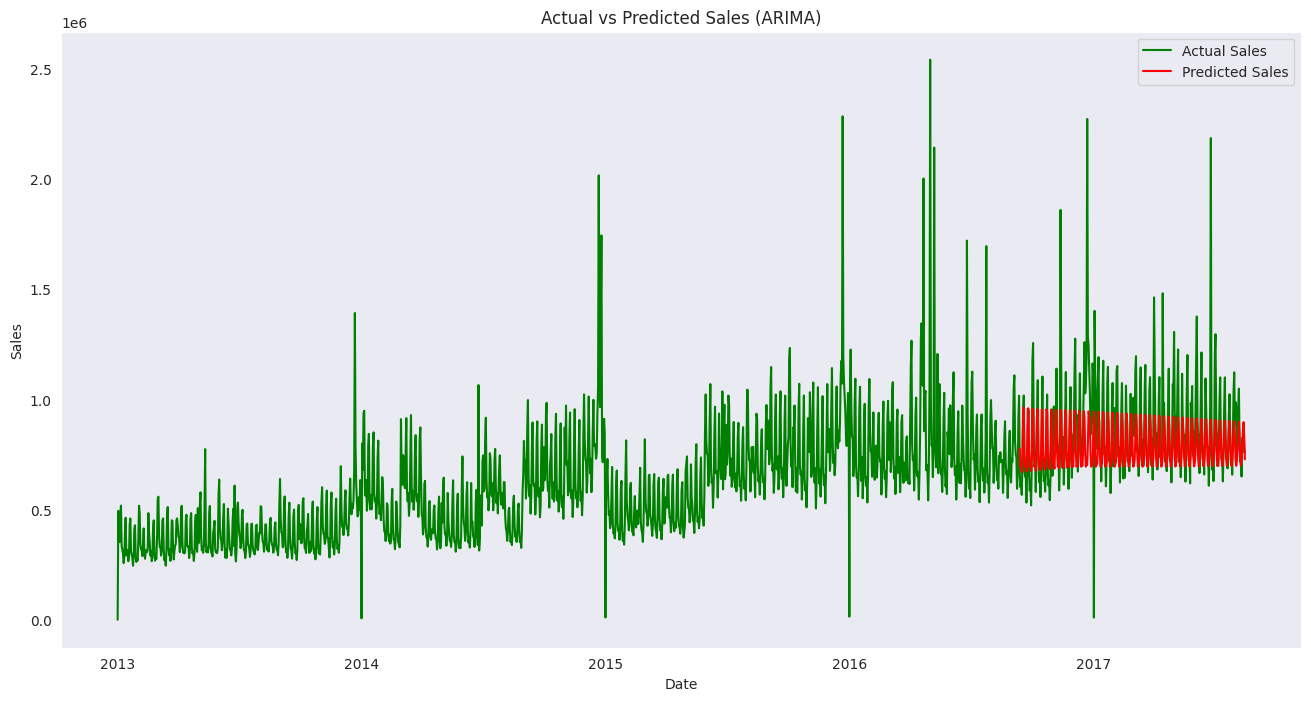

In [85]:
# Lets analyze the model performance visually
plt.figure(figsize = (16, 8))
plt.plot(simple_df.index, simple_df, color = 'green', label = "Actual Sales")
plt.plot(test.index, predicted, color = 'red', label = "Predicted Sales")

plt.legend()

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (ARIMA)')

plt.show()

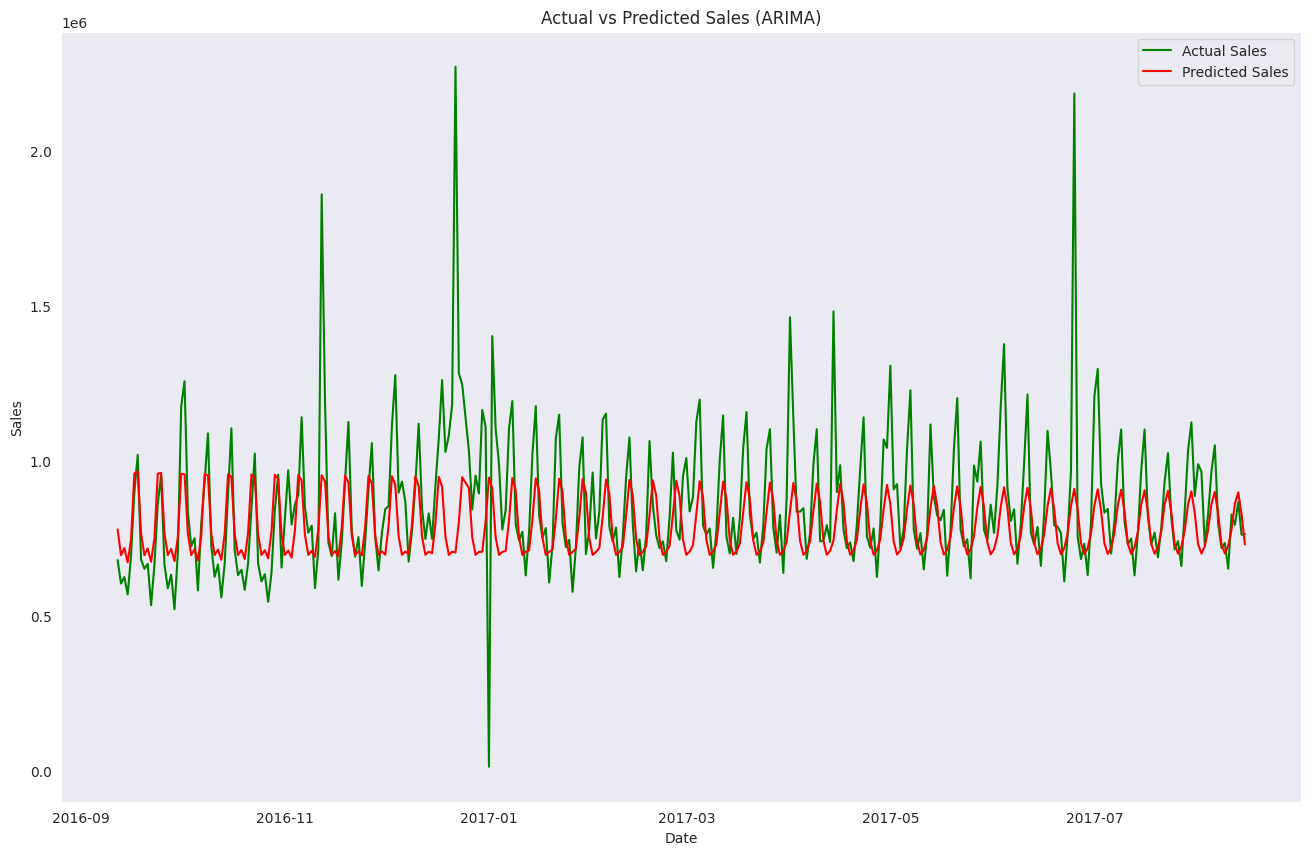

In [86]:
# A more detailed performance graph
plt.figure(figsize = (16, 10))
plt.plot(test.index, test, color = 'green', label = "Actual Sales")
plt.plot(test.index, predicted, color = 'red', label = "Predicted Sales")

plt.legend()

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (ARIMA)')

plt.show()


As we can see from the graph, the model performance is not quite what we want. And as we go far from our training data in terms of time, the error increases. Now we will use the seasonal component to our advantage using SARIMA Models.

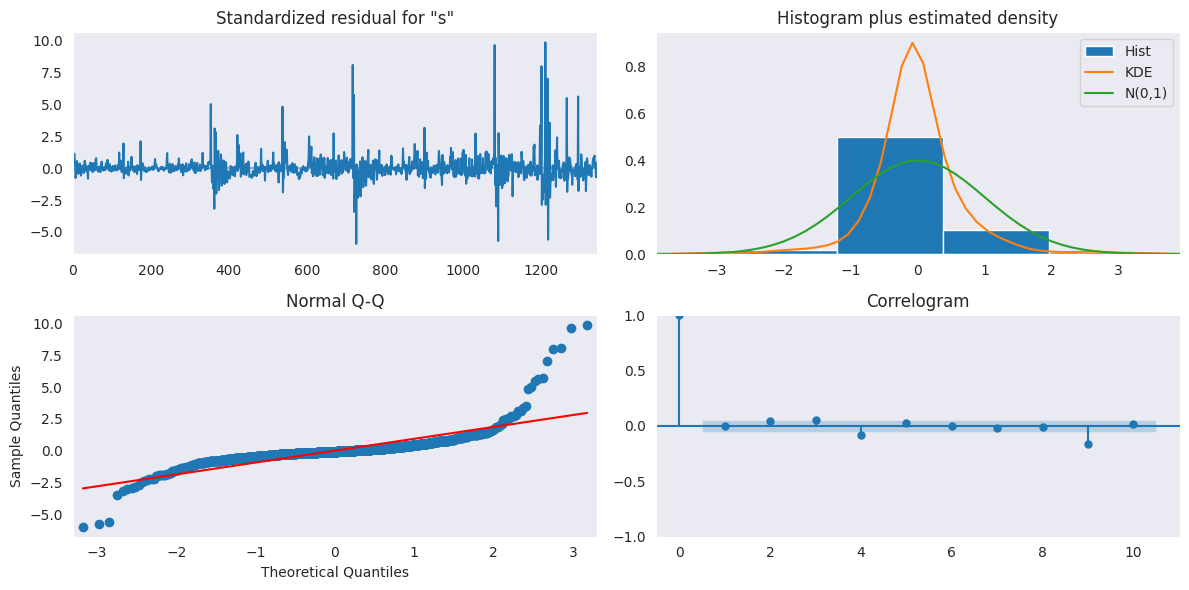

In [87]:
# Model Diagnostics
best_arima_model.plot_diagnostics(figsize = (12, 6))
plt.tight_layout()
plt.show()

The **Histogram plus Estimated Density Plot** indicates that the residuals are far from normal distribution.
- The orange line is a smoothed version of our residual distribution.
- The green line is a normal distribution.

We will improve this with the more enhanced models.

***
<center style="color:#2a9d8f"><h3>Creating an SARIMA Model</h3></center>

***

SARIMA stands for Seasonal-ARIMA and it includes seasonality contribution to the forecast. The importance of seasonality is quite evident and ARIMA fails to encapsulate that information implicitly.

The Autoregressive (AR), Integrated (I), and Moving Average (MA) parts of the model remain as that of ARIMA. The addition of Seasonality adds robustness to the SARIMA model. It’s represented as: $\text{SARIMA}\;(p,d,q)\;\text{x}\;(P,D,Q,s)$

Even though we have some estimated values for our *`p`* and *`q`* parameters, we will do a grid search to find out optimal values.

> *`Note`: Even though our data is on a daily interval, we are still using the seasonal value of 12. Modelling on 365 seasonal value is an extremely resource intensive job and takes too long.*

For each combination of parameters, we fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality.


In [88]:
# Defining the p, d and q parameters
p = [5]
d = [1]
q = [5, 7]

# Generating all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generating all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('Total Combinations:', len(pdq)*len(seasonal_pdq))
print('SARIMAX: {} x {}'.format(pdq[0], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[0], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))

Examples of parameter combinations for Seasonal ARIMA...
Total Combinations: 4
SARIMAX: (5, 1, 5) x (5, 1, 5, 12)
SARIMAX: (5, 1, 5) x (5, 1, 7, 12)
SARIMAX: (5, 1, 7) x (5, 1, 5, 12)


In [89]:
# Code to create SARIMA Models and select the best model
best_sarima_model = None
best_sarima_aic = float("inf")
data_sarima_list = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            sarima_model = sm.tsa.statespace.SARIMAX(train, order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = sarima_model.fit(disp = 0)
            print("\nModel Fit Success")

            # Predict using the SARIMA model
            predicted = results.predict(start = len(train), end = len(simple_df)-1)

            # Calculate AIC (Akaike Information Criterion)
            aic = results.aic

            # Calculate Evaluation Metrics and append into list
            metrics_data = calculate_metrics(test, predicted)
            metrics_data.update({"Model":'SARIMA{} x {}'.format(param, param_seasonal), "AIC": aic})
            data_sarima_list.append(metrics_data)

            print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))

            if aic < best_sarima_aic:
              best_sarima_aic = aic
              best_sarima_model = results
              print(f"\nFound better model - {param} x {param_seasonal}, AIC:{aic} \n{'*'*50}")

        except Exception as e:
          # Handle any exceptions that might occur during model fitting
          print(f"Error occurred for p:{p}, d:{d}, q:{q}: {e}")

# Creating the dataframe of evaluation metrics
results_sarima_df = pd.DataFrame(data_sarima_list, columns = ['Model', 'MAE', 'MSE', 'RMSE', 'RMSLE', 'AIC'])

# Print the summary of the best model
print("\n\n\n\n")
if best_sarima_model:
    print(best_sarima_model.summary())
else:
    print("No valid model found.")


Model Fit Success
SARIMA(5, 1, 5)x(5, 1, 5, 12) - AIC:34044.90313947279

Found better model - (5, 1, 5) x (5, 1, 5, 12), AIC:34044.90313947279 
**************************************************

Model Fit Success
SARIMA(5, 1, 5)x(5, 1, 7, 12) - AIC:33583.86555732069

Found better model - (5, 1, 5) x (5, 1, 7, 12), AIC:33583.86555732069 
**************************************************

Model Fit Success
SARIMA(5, 1, 7)x(5, 1, 5, 12) - AIC:34082.35963408259

Model Fit Success
SARIMA(5, 1, 7)x(5, 1, 7, 12) - AIC:33448.18984688175

Found better model - (5, 1, 7) x (5, 1, 7, 12), AIC:33448.18984688175 
**************************************************





                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                 1347
Model:             SARIMAX(5, 1, 7)x(5, 1, 7, 12)   Log Likelihood              -16699.095
Date:                            Sun, 19 Nov 2023   AIC      

In [90]:
# The dataframe of evaluation metrics
results_sarima_df

Model            MAE           MSE  \
0  SARIMA(5, 1, 5) x (5, 1, 5, 12)  134982.119868  4.110912e+10   
1  SARIMA(5, 1, 5) x (5, 1, 7, 12)  130877.898964  3.983800e+10   
2  SARIMA(5, 1, 7) x (5, 1, 5, 12)  119547.594977  3.576931e+10   
3  SARIMA(5, 1, 7) x (5, 1, 7, 12)  120251.549561  3.548994e+10   

            RMSE     RMSLE           AIC  
0  202753.852583  0.314513  34044.903139  
1  199594.593525  0.308486  33583.865557  
2  189127.758634  0.296798  34082.359634  
3  188387.746309  0.296572  33448.189847


The best performing model is **ARIMA (5, 1, 7) X (5, 1, 7, 12)** with **AIC = 33448**

Using SARIMA Model has increased our model performance a little bit more.

Since our best model is already stored in `best_sarima_model`, we don't need to fit it once again.

In [91]:
# Updating the metrics_df
results_sarima_df.sort_values(by = 'RMSLE', inplace = True)

metrics_df = pd.concat([metrics_df, results_sarima_df.head(1)]).reset_index(drop = True)
metrics_df

Model            MAE           MSE  \
0                    ARIMA 5, 1, 7  128670.451463  4.147424e+10   
1  SARIMA(5, 1, 7) x (5, 1, 7, 12)  120251.549561  3.548994e+10   

            RMSE     RMSLE           AIC  
0  203652.261011  0.304170  35679.184222  
1  188387.746309  0.296572  33448.189847

In [92]:
# Predict using the best SARIMA model
predicted = best_sarima_model.predict(start = len(train), end = len(simple_df)-1)

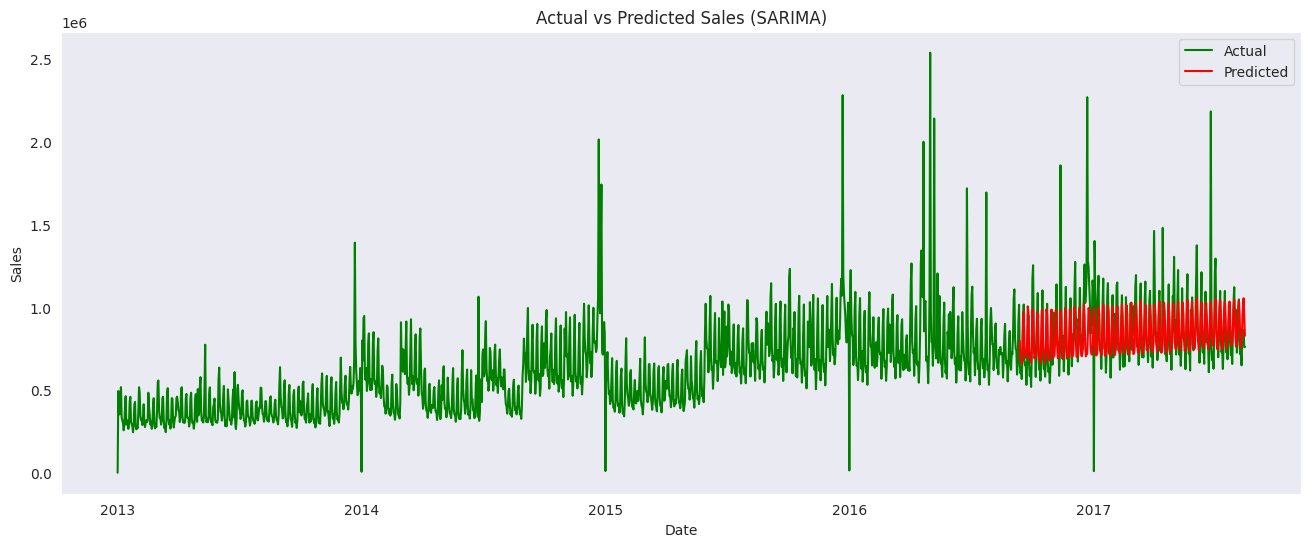

In [93]:
# Lets analyze the model performance visually
plt.figure(figsize = (16, 6))
plt.plot(simple_df.index, simple_df, color = 'green', label = "Actual")
plt.plot(test.index, predicted, color = 'red', label = "Predicted")

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (SARIMA)')
plt.legend()

plt.show()

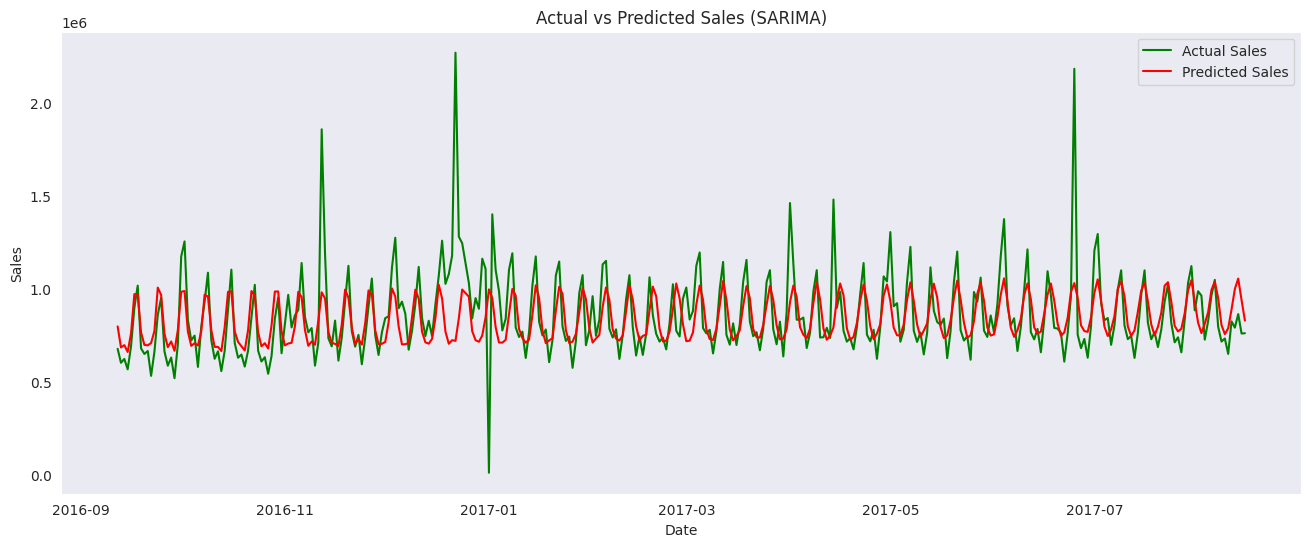

In [94]:
# Lets analyze the model performance visually
plt.figure(figsize = (16, 6))
plt.plot(test.index, test, color = 'green', label = "Actual Sales")
plt.plot(test.index, predicted, color = 'red', label = "Predicted Sales")

plt.legend()

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (SARIMA)')

plt.show()

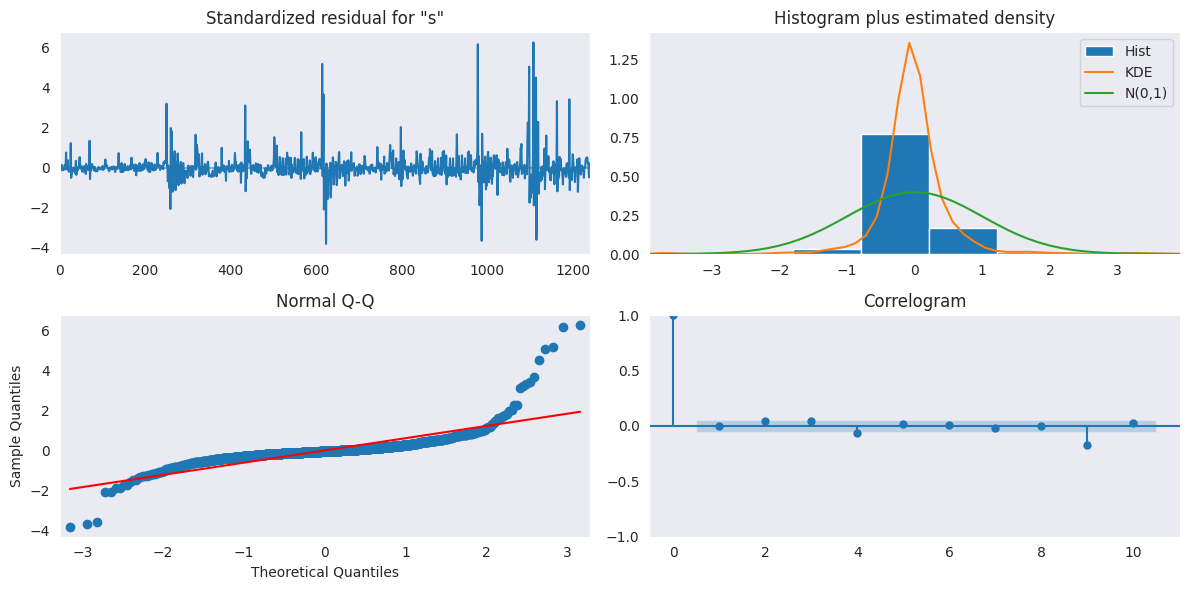

In [95]:
# Model Diagnostics
best_sarima_model.plot_diagnostics(figsize = (12, 6))
plt.tight_layout()
plt.show()

***
From the previous ARIMA model, our SARIMA is a little bit more effective in capturing the information. Although it is not able to detect the sudden spikes and decrease in sales (That might depend on other variables which we haven't used to create our model).

In time-series, we generally don't need prediction of the far future. For example: Someone trying to predict car sales prioritize prediction of next month, or the next three months rather than the next six months or year. And when the next prediction windows has passed, the actual data can be used to predict the next window. This actually results in better models and is called **Rolling Forecast**.

***
Rolling forecasts are generally effective in increasing accuracy and performance as future values generally depend on latest prior values.

We will use the **rolling forecast** only for ARIMA models as SARIMA is too resource intensive and takes too much time.
***

In [96]:
# Creating new train data because it will be updated after each loop
rolling_train = train.copy()
rolling_train.head()

sales
date                     
2013-01-01    2511.618999
2013-01-02  496092.417944
2013-01-03  361461.231124
2013-01-04  354459.677093
2013-01-05  477350.121229

In [97]:
print("Rolling Train DataFrame Shape:", rolling_train.shape)
print("Test DataFrame Shape:", test.shape)
print("Number of Iterations to match the test data shape:", test.shape[0]/7)

Rolling Train DataFrame Shape: (1347, 1)
Test DataFrame Shape: (337, 1)
Number of Iterations to match the test data shape: 48.142857142857146


In [98]:
'''
The following code starts with the rolling_train dataset
and predicts the next 7 steps (days) after creating an arima model.
Then it appends the predicted data to the rolling_train df and
iterates the process.
'''

# To track whether the loop is successful
print("Successfull Iterations: ", end ='')

for i in range(48):
  model = sm.tsa.ARIMA(rolling_train, order=(5, 1, 7))
  temp_results = model.fit()
  pred = temp_results.forecast(steps = 7)
  next_dates = pd.date_range(start = rolling_train.index[-1], periods = 8)
  temp_df = pd.DataFrame(data = {'sales': list(pred)}, index = next_dates.drop(next_dates[0]))
  rolling_train = pd.concat([rolling_train, temp_df])
  print(i+1, end = ' ')

Successfull Iterations: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 

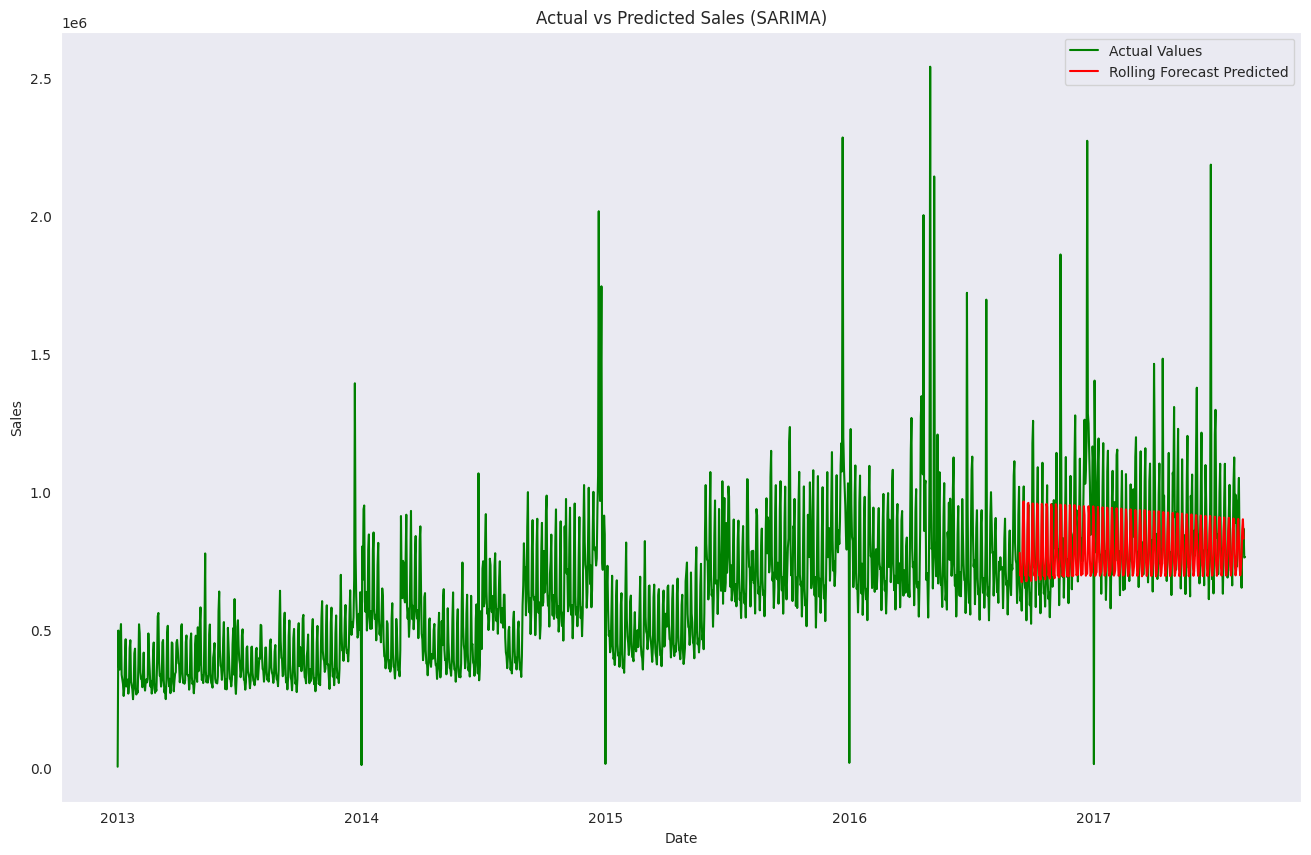

In [99]:
plt.figure(figsize = (16, 10))
plt.plot(simple_df.index, simple_df, color = "green", label = "Actual Values")
plt.plot(rolling_train.index[1347:], rolling_train[1347:], color = "red", label = "Rolling Forecast Predicted")

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (SARIMA)')
plt.legend()

plt.show()

In [100]:
# Evaluation of final rolling forecast model
rolling_model_perf = calculate_metrics(test[:-1], rolling_train[1347:])
rolling_model_perf.update({'Model': 'Rolling Forecast ARIMA', 'AIC': temp_results.aic})
rolling_model_perf = pd.DataFrame([rolling_model_perf], columns = ['Model', 'MAE', 'MSE', 'RMSE', 'RMSLE', 'AIC'])
rolling_model_perf

Model            MAE           MSE           RMSE  \
0  Rolling Forecast ARIMA  128937.283782  4.155421e+10  203848.503171   

      RMSLE           AIC  
0  0.304625  44026.855589

No significant improvement in predictions.

In [164]:
# Updating metrics_df
metrics_df = pd.concat([metrics_df, rolling_model_perf.head(1)]).reset_index(drop = True)
metrics_df

Model            MAE           MSE  \
0  SARIMA(5, 1, 7) x (5, 1, 7, 12)  120251.549561  3.548994e+10   
1                    ARIMA 5, 1, 7  128670.451463  4.147424e+10   
2            Prophet Multi-Variate   74357.413720  9.121842e+09   
3           Rolling Forecast ARIMA  128937.283782  4.155421e+10   

            RMSE     RMSLE           AIC  
0  188387.746309  0.296572  33448.189847  
1  203652.261011  0.304170  35679.184222  
2   95508.337092  0.207798            NA  
3  203848.503171  0.304625  44026.855589

***
<a id='multivar'></a>
<h3 style="text-align: center; background-color: #e07a5f; border-radius: 5px; padding: 7px 5px 7px 5px; margin: 0px;">MULTIVARIATE MODELLING</h3>

***

We will use the rest of the data available in prediciting the sales value. Multivariate modelling involves algorithm that use multiple predictor variables to predict the target/output variable.


In [102]:
df.head()

date  store_nbr      family  sales  onpromotion  oil_price   city  \
0 2013-01-01          1  AUTOMOTIVE    0.0            0      93.14  Quito   
1 2013-01-01          1   BABY CARE    0.0            0      93.14  Quito   
2 2013-01-01          1      BEAUTY    0.0            0      93.14  Quito   
3 2013-01-01          1   BEVERAGES    0.0            0      93.14  Quito   
4 2013-01-01          1       BOOKS    0.0            0      93.14  Quito   

  holiday_type    locale  transferred  transactions  
0      Holiday  National        False           0.0  
1      Holiday  National        False           0.0  
2      Holiday  National        False           0.0  
3      Holiday  National        False           0.0  
4      Holiday  National        False           0.0

***
<center style="color:#2a9d8f"><h3>Encoding Categorical Labels</h3></center>

***

Encoding categorical labels is an important step in data modelling. It helps the model to fit the data more accurately and improves the overall understanding and performance of the model.

In [103]:
# All unique values in a column

print("UNIQUE VALUES ==== \n\n")

for i in ['holiday_type', 'locale', 'transferred']:
  print(f'{i.upper()} == \n', df[i].unique(), f"\n{'='*100}\n")

UNIQUE VALUES ==== 


HOLIDAY_TYPE == 
 ['Holiday' 'Not Holiday' 'Work Day' 'Additional' 'Event' 'Transfer'
 'Bridge'] 

LOCALE == 
 ['National' 'Not Holiday' 'Local' 'Regional'] 

TRANSFERRED == 
 [False  True] 



*`Transferred`* can be encoded as a boolean variable (1 for True and 0 for False).

Since *`Holiday`* consists of multiple different categorical labels, we can use **One Hot Encoding** and encode it using `pd.get_dummies()`

- Dropping *`locale`* as it might not have much effect on sales as majority of sales happen on *Not Holiday*.
- We will also drop *`Family`* to consolidate the data because presently it is too big and will take too much time to model. (Resource and Time constraint)
- Dropping *`store_nbr`* and *`city`* because we are going to aggregate the data in the next step.



In [104]:
df.drop(['locale', 'family', 'store_nbr', 'city'], axis = 1, inplace = True)
df.head()

date  sales  onpromotion  oil_price holiday_type  transferred  \
0 2013-01-01    0.0            0      93.14      Holiday        False   
1 2013-01-01    0.0            0      93.14      Holiday        False   
2 2013-01-01    0.0            0      93.14      Holiday        False   
3 2013-01-01    0.0            0      93.14      Holiday        False   
4 2013-01-01    0.0            0      93.14      Holiday        False   

   transactions  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

***
<center style="color:#2a9d8f"><h3>Using Facebook Prophet</h3></center>

***

Facebook Prophet is an open source time-series analysis framework that is pretty robust and excellent in dealing with time series data. It is also intelligent at detecting the best hyperparameters, seasonality and other aspects when they are not specified by the user.

In [105]:
!pip install prophet --quiet
from prophet import Prophet

In [106]:
# Aggregating the data on a daily basis
prophet_data = df.groupby(["date", "holiday_type", "transferred" ])\
                        .agg({"oil_price": "mean",
                        "sales": "sum", "onpromotion": "sum","transactions": "sum"})\
                        .reset_index()

print("DATA FOR MULTIVARIATE ANALYSIS USING FB PROPHET:\n\n")

prophet_data.head()

DATA FOR MULTIVARIATE ANALYSIS USING FB PROPHET:




date holiday_type  transferred  oil_price          sales  onpromotion  \
0 2013-01-01      Holiday        False  93.140000    2511.618999            0   
1 2013-01-02  Not Holiday        False  93.140000  496092.417944            0   
2 2013-01-03  Not Holiday        False  92.970000  361461.231124            0   
3 2013-01-04  Not Holiday        False  93.120000  354459.677093            0   
4 2013-01-05     Work Day        False  93.140006  477350.121229            0   

   transactions  
0       25410.0  
1     3076095.0  
2     2590632.0  
3     2590302.0  
4     3087909.0

In [107]:
# Enconding the columns
prophet_data['transferred'] = prophet_data['transferred'].astype(int)

prophet_data = pd.get_dummies(prophet_data, columns=['holiday_type'], drop_first=True)

prophet_data.head()

date  transferred  oil_price          sales  onpromotion  \
0 2013-01-01            0  93.140000    2511.618999            0   
1 2013-01-02            0  93.140000  496092.417944            0   
2 2013-01-03            0  92.970000  361461.231124            0   
3 2013-01-04            0  93.120000  354459.677093            0   
4 2013-01-05            0  93.140006  477350.121229            0   

   transactions  holiday_type_Bridge  holiday_type_Event  \
0       25410.0                    0                   0   
1     3076095.0                    0                   0   
2     2590632.0                    0                   0   
3     2590302.0                    0                   0   
4     3087909.0                    0                   0   

   holiday_type_Holiday  holiday_type_Not Holiday  holiday_type_Transfer  \
0                     1                         0                      0   
1                     0                         1                      0   
2                     0                         1                      0   
3                     0                         1                      0   
4                     0                         0                      0   

   holiday_type_Work Day  
0                      0  
1                      0  
2                      0  
3                      0  
4                      1

In [108]:
prophet_data.transferred.unique()

array([0, 1])

In [153]:
# Train and Test Dataset
train, test = train_test_split(prophet_data, train_size=0.8)
print(f"Train Shape: {train.shape}, Test Shape: {test.shape}")

Train Shape: (1357, 12), Test Shape: (340, 12)


In [154]:
# Renaming columns name to satisfy prophet requirements
train = train.rename(columns = {"date": "ds", "sales": "y"})

test = test.rename(columns = {"date": "ds", "sales": "y"})

print(train.columns, "\n\n", test.columns)

Index(['ds', 'transferred', 'oil_price', 'y', 'onpromotion', 'transactions',
       'holiday_type_Bridge', 'holiday_type_Event', 'holiday_type_Holiday',
       'holiday_type_Not Holiday', 'holiday_type_Transfer',
       'holiday_type_Work Day'],
      dtype='object') 

 Index(['ds', 'transferred', 'oil_price', 'y', 'onpromotion', 'transactions',
       'holiday_type_Bridge', 'holiday_type_Event', 'holiday_type_Holiday',
       'holiday_type_Not Holiday', 'holiday_type_Transfer',
       'holiday_type_Work Day'],
      dtype='object')


In [111]:
train.head()

ds  transferred  oil_price              y  onpromotion  \
0 2013-01-01            0  93.140000    2511.618999            0   
1 2013-01-02            0  93.140000  496092.417944            0   
2 2013-01-03            0  92.970000  361461.231124            0   
3 2013-01-04            0  93.120000  354459.677093            0   
4 2013-01-05            0  93.140006  477350.121229            0   

   transactions  holiday_type_Bridge  holiday_type_Event  \
0       25410.0                    0                   0   
1     3076095.0                    0                   0   
2     2590632.0                    0                   0   
3     2590302.0                    0                   0   
4     3087909.0                    0                   0   

   holiday_type_Holiday  holiday_type_Not Holiday  holiday_type_Transfer  \
0                     1                         0                      0   
1                     0                         1                      0   
2                     0                         1                      0   
3                     0                         1                      0   
4                     0                         0                      0   

   holiday_type_Work Day  
0                      0  
1                      0  
2                      0  
3                      0  
4                      1

In [112]:
test.head()

ds  transferred  oil_price             y  onpromotion  \
1357 2016-09-11            0  46.179972  1.017369e+06         7187   
1358 2016-09-12            0  46.280000  6.787765e+05         5902   
1359 2016-09-13            0  44.910000  6.034279e+05         7836   
1360 2016-09-14            0  43.620000  6.242621e+05        13238   
1361 2016-09-15            0  43.850000  5.683248e+05         8373   

      transactions  holiday_type_Bridge  holiday_type_Event  \
1357     3023130.0                    0                   0   
1358     2545125.0                    0                   0   
1359     2443056.0                    0                   0   
1360     2412168.0                    0                   0   
1361     2466453.0                    0                   0   

      holiday_type_Holiday  holiday_type_Not Holiday  holiday_type_Transfer  \
1357                     0                         1                      0   
1358                     0                         1                      0   
1359                     0                         1                      0   
1360                     0                         1                      0   
1361                     0                         1                      0   

      holiday_type_Work Day  
1357                      0  
1358                      0  
1359                      0  
1360                      0  
1361                      0

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 0 to 1356
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ds                        1357 non-null   datetime64[ns]
 1   transferred               1357 non-null   int64         
 2   oil_price                 1357 non-null   float64       
 3   y                         1357 non-null   float64       
 4   onpromotion               1357 non-null   int64         
 5   transactions              1357 non-null   float64       
 6   holiday_type_Bridge       1357 non-null   uint8         
 7   holiday_type_Event        1357 non-null   uint8         
 8   holiday_type_Holiday      1357 non-null   uint8         
 9   holiday_type_Not Holiday  1357 non-null   uint8         
 10  holiday_type_Transfer     1357 non-null   uint8         
 11  holiday_type_Work Day     1357 non-null   uint8         
dtypes: datetime64[ns](1)

In [114]:
train_columns = [x for x in train.columns if x not in ['ds', 'y']]
train_columns

['transferred',
 'oil_price',
 'onpromotion',
 'transactions',
 'holiday_type_Bridge',
 'holiday_type_Event',
 'holiday_type_Holiday',
 'holiday_type_Not Holiday',
 'holiday_type_Transfer',
 'holiday_type_Work Day']

In [115]:
# Defining the model
model = Prophet(yearly_seasonality= True, seasonality_mode= "multiplicative")

# Adding Regressors (predictors)
for i in train_columns:
  model.add_regressor(i, standardize = True)

model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx5kh_4hf/ljufd8yw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx5kh_4hf/m98_yhb1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36958', 'data', 'file=/tmp/tmpx5kh_4hf/ljufd8yw.json', 'init=/tmp/tmpx5kh_4hf/m98_yhb1.json', 'output', 'file=/tmp/tmpx5kh_4hf/prophet_modelwdnx1pdv/prophet_model-20231119130946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [116]:
model.params

OrderedDict([('lp__', array([[3433.96]])),
             ('k', array([[0.153529]])),
             ('m', array([[0.218967]])),
             ('delta',
              array([[-4.39527e-08, -5.69355e-07, -2.78514e-06, -3.45427e-10,
                       1.25664e-08,  2.02388e-01,  8.31864e-02, -2.73571e-08,
                      -5.90459e-04, -9.58828e-02,  8.09415e-09,  1.02925e-05,
                      -3.42011e-10, -7.30057e-08, -4.61379e-01, -3.42946e-01,
                       1.01671e-08,  7.66117e-01,  7.06697e-01, -1.75068e-08,
                      -1.89765e-01, -6.68183e-01, -1.68106e-01,  6.63718e-08,
                      -1.59233e-08]])),
             ('sigma_obs', array([[0.0456107]])),
             ('beta',
              array([[-3.32110e-02,  5.91704e-02,  3.06005e-06,  1.02741e-02,
                      -3.86102e-03, -2.84618e-03, -1.47340e-02,  4.96346e-02,
                      -6.94430e-04,  6.53964e-03,  1.68950e-02,  7.41653e-03,
                      -7.51982e-04,  1

In [117]:
# Predictions for the future dates
forecast = model.predict(test.drop('y', axis = 1))

In [118]:
forecast.head()

ds          trend     yhat_lower    yhat_upper    trend_lower  \
0 2016-09-11  733696.345032  941801.752403  1.147841e+06  733696.345032   
1 2016-09-12  733677.290859  663130.351613  8.640680e+05  733677.290859   
2 2016-09-13  733658.236685  602467.149247  7.992590e+05  733658.236685   
3 2016-09-14  733639.182511  652146.804639  8.548205e+05  733639.182511   
4 2016-09-15  733620.128337  577082.492172  7.716753e+05  733620.128337   

     trend_upper  extra_regressors_multiplicative  \
0  733696.345032                         0.131864   
1  733677.290859                        -0.035440   
2  733658.236685                        -0.036338   
3  733639.182511                         0.041168   
4  733620.128337                        -0.021310   

   extra_regressors_multiplicative_lower  \
0                               0.131864   
1                              -0.035440   
2                              -0.036338   
3                               0.041168   
4                              -0.021310   

   extra_regressors_multiplicative_upper  holiday_type_Bridge  ...    weekly  \
0                               0.131864            -0.000232  ...  0.244365   
1                              -0.035440            -0.000232  ...  0.022566   
2                              -0.036338            -0.000232  ... -0.058248   
3                               0.041168            -0.000232  ... -0.083074   
4                              -0.021310            -0.000232  ... -0.117727   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0      0.244365      0.244365  0.051802      0.051802      0.051802   
1      0.022566      0.022566  0.054742      0.054742      0.054742   
2     -0.058248     -0.058248  0.057071      0.057071      0.057071   
3     -0.083074     -0.083074  0.058808      0.058808      0.058808   
4     -0.117727     -0.117727  0.059980      0.059980      0.059980   

   additive_terms  additive_terms_lower  additive_terms_upper          yhat  
0             0.0                   0.0                   0.0  1.047741e+06  
1             0.0                   0.0                   0.0  7.643948e+05  
2             0.0                   0.0                   0.0  7.061352e+05  
3             0.0                   0.0                   0.0  7.460394e+05  
4             0.0                   0.0                   0.0  6.756226e+05  

[5 rows x 52 columns]

In [155]:
# Extracting the required columns from forecast df
forecast = forecast[['ds', 'yhat']]
forecast.head()

ds          yhat
0 2016-09-11  1.047741e+06
1 2016-09-12  7.643948e+05
2 2016-09-13  7.061352e+05
3 2016-09-14  7.460394e+05
4 2016-09-15  6.756226e+05

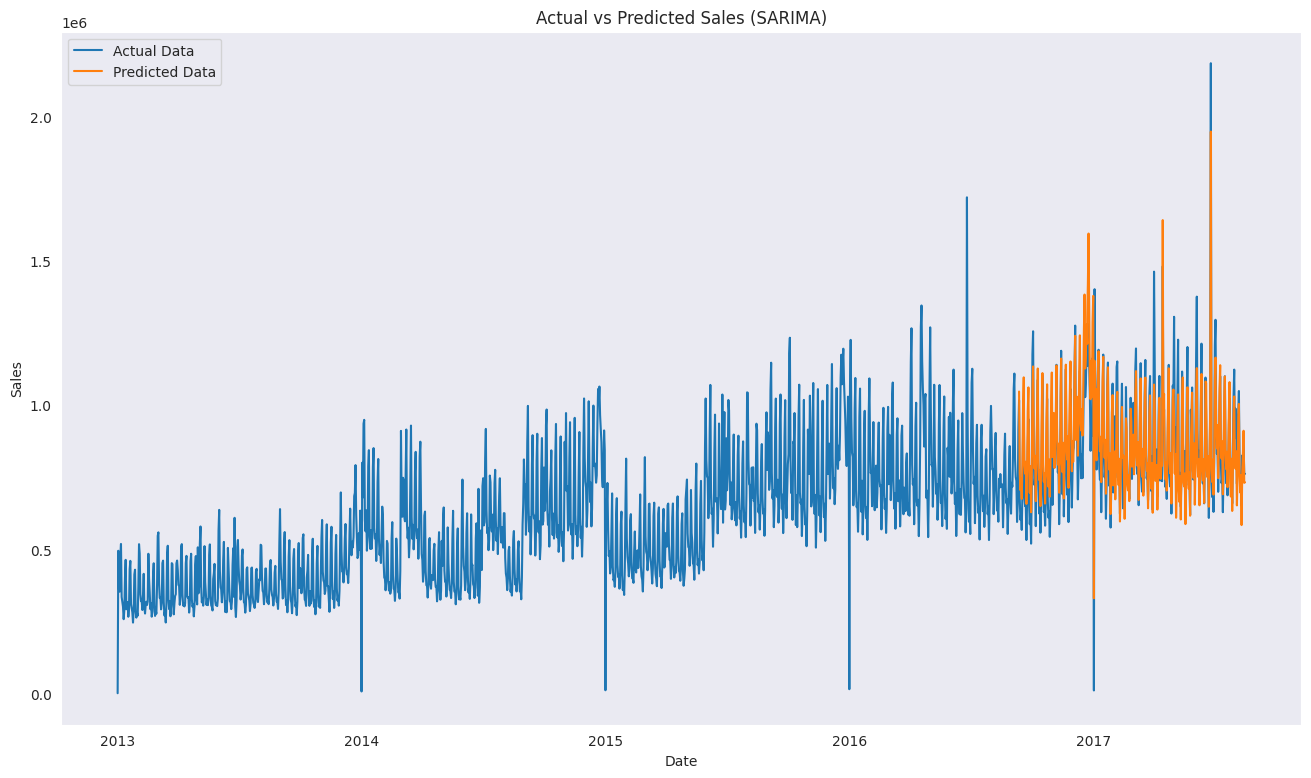

In [120]:
plt.figure(figsize = (16, 9))
plt.plot(prophet_data.date, prophet_data.sales,  label = "Actual Data")
plt.plot(test.ds, forecast.yhat, label = "Predicted Data")

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (SARIMA)')
plt.legend()

plt.show()

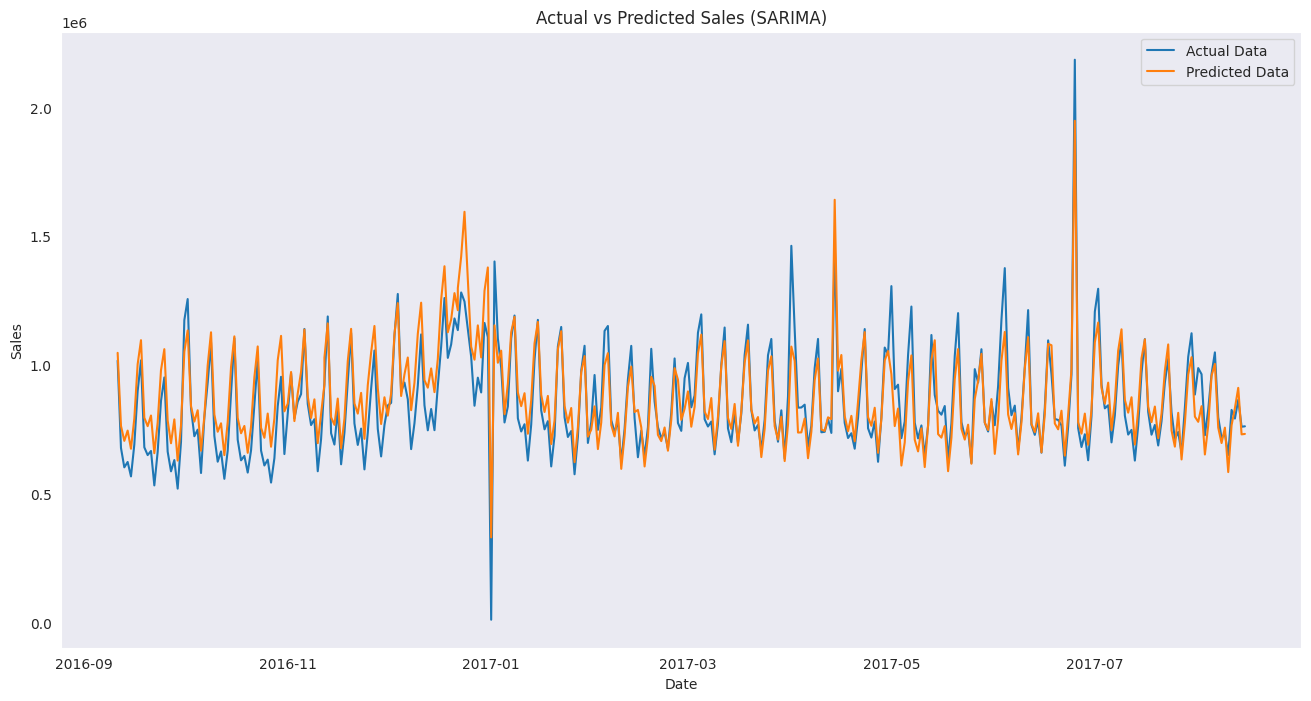

In [121]:
plt.figure(figsize = (16, 8))
plt.plot(test.ds, test.y, label = "Actual Data")
plt.plot(test.ds, forecast.yhat, label = "Predicted Data")

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (SARIMA)')
plt.legend()

plt.show()

The results have significantly improved by using multivariate models. We can also transform our data and apply some machine learning models for prediction.

Recording performance in our dataframe.

In [156]:
# Updating evaluation metrics dataframe
temp_var = calculate_metrics(test.y, forecast.yhat)
temp_var.update({'Model': 'Prophet Multi-Variate', 'AIC': 'NA'})
temp_var = pd.DataFrame([temp_var], columns = ['Model', 'MAE', 'MSE', 'RMSE', 'RMSLE', 'AIC'])
metrics_df = pd.concat([metrics_df, temp_var.head(1)]).reset_index(drop = True)

In [163]:
metrics_df

Model            MAE           MSE  \
0  SARIMA(5, 1, 7) x (5, 1, 7, 12)  120251.549561  3.548994e+10   
1                    ARIMA 5, 1, 7  128670.451463  4.147424e+10   
2            Prophet Multi-Variate   74357.413720  9.121842e+09   

            RMSE     RMSLE           AIC  
0  188387.746309  0.296572  33448.189847  
1  203652.261011  0.304170  35679.184222  
2   95508.337092  0.207798            NA

***
<center style="color:#2a9d8f"><h3>Using Decision Trees</h3></center>

***

To fit a decision tree on our data, we first need to restructure the data into a suitable format.


In [124]:
# Import the required modules and packages
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

In [125]:
prophet_data.head()

date  transferred  oil_price          sales  onpromotion  \
0 2013-01-01            0  93.140000    2511.618999            0   
1 2013-01-02            0  93.140000  496092.417944            0   
2 2013-01-03            0  92.970000  361461.231124            0   
3 2013-01-04            0  93.120000  354459.677093            0   
4 2013-01-05            0  93.140006  477350.121229            0   

   transactions  holiday_type_Bridge  holiday_type_Event  \
0       25410.0                    0                   0   
1     3076095.0                    0                   0   
2     2590632.0                    0                   0   
3     2590302.0                    0                   0   
4     3087909.0                    0                   0   

   holiday_type_Holiday  holiday_type_Not Holiday  holiday_type_Transfer  \
0                     1                         0                      0   
1                     0                         1                      0   
2                     0                         1                      0   
3                     0                         1                      0   
4                     0                         0                      0   

   holiday_type_Work Day  
0                      0  
1                      0  
2                      0  
3                      0  
4                      1

In [126]:
# Creating a copy of the prophet_data
dt_df = prophet_data.copy()

In [127]:
# Creating more features using date column
dt_df['day'] = dt_df['date'].dt.day
dt_df['week'] = dt_df['date'].dt.isocalendar().week.astype(int)
dt_df['month'] = dt_df['date'].dt.month
dt_df['year'] = dt_df['date'].dt.year
dt_df['quarter'] = dt_df['date'].dt.quarter

In [128]:
dt_df.head()

date  transferred  oil_price          sales  onpromotion  \
0 2013-01-01            0  93.140000    2511.618999            0   
1 2013-01-02            0  93.140000  496092.417944            0   
2 2013-01-03            0  92.970000  361461.231124            0   
3 2013-01-04            0  93.120000  354459.677093            0   
4 2013-01-05            0  93.140006  477350.121229            0   

   transactions  holiday_type_Bridge  holiday_type_Event  \
0       25410.0                    0                   0   
1     3076095.0                    0                   0   
2     2590632.0                    0                   0   
3     2590302.0                    0                   0   
4     3087909.0                    0                   0   

   holiday_type_Holiday  holiday_type_Not Holiday  holiday_type_Transfer  \
0                     1                         0                      0   
1                     0                         1                      0   
2                     0                         1                      0   
3                     0                         1                      0   
4                     0                         0                      0   

   holiday_type_Work Day  day  week  month  year  quarter  
0                      0    1     1      1  2013        1  
1                      0    2     1      1  2013        1  
2                      0    3     1      1  2013        1  
3                      0    4     1      1  2013        1  
4                      1    5     1      1  2013        1

In [129]:
dt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      1697 non-null   datetime64[ns]
 1   transferred               1697 non-null   int64         
 2   oil_price                 1697 non-null   float64       
 3   sales                     1697 non-null   float64       
 4   onpromotion               1697 non-null   int64         
 5   transactions              1697 non-null   float64       
 6   holiday_type_Bridge       1697 non-null   uint8         
 7   holiday_type_Event        1697 non-null   uint8         
 8   holiday_type_Holiday      1697 non-null   uint8         
 9   holiday_type_Not Holiday  1697 non-null   uint8         
 10  holiday_type_Transfer     1697 non-null   uint8         
 11  holiday_type_Work Day     1697 non-null   uint8         
 12  day                 

In [130]:
# Splitting the data into train and test
train, test = train_test_split(dt_df.drop('date', axis = 1), train_size=0.8)
print(f"Train Shape: {train.shape}, Test Shape: {test.shape}")

Train Shape: (1357, 16), Test Shape: (340, 16)


In [131]:
train.head()

transferred  oil_price          sales  onpromotion  transactions  \
0            0  93.140000    2511.618999            0       25410.0   
1            0  93.140000  496092.417944            0     3076095.0   
2            0  92.970000  361461.231124            0     2590632.0   
3            0  93.120000  354459.677093            0     2590302.0   
4            0  93.140006  477350.121229            0     3087909.0   

   holiday_type_Bridge  holiday_type_Event  holiday_type_Holiday  \
0                    0                   0                     1   
1                    0                   0                     0   
2                    0                   0                     0   
3                    0                   0                     0   
4                    0                   0                     0   

   holiday_type_Not Holiday  holiday_type_Transfer  holiday_type_Work Day  \
0                         0                      0                      0   
1                         1                      0                      0   
2                         1                      0                      0   
3                         1                      0                      0   
4                         0                      0                      1   

   day  week  month  year  quarter  
0    1     1      1  2013        1  
1    2     1      1  2013        1  
2    3     1      1  2013        1  
3    4     1      1  2013        1  
4    5     1      1  2013        1

In [132]:
X_train = train.drop('sales', axis = 1)
y_train = train['sales']

X_test = test.drop('sales', axis = 1)
y_test = test['sales']

In [133]:
X_train.shape, y_test.shape, X_test.shape, y_test.shape

((1357, 15), (340,), (340, 15), (340,))

In [134]:
X_train.head()

transferred  oil_price  onpromotion  transactions  holiday_type_Bridge  \
0            0  93.140000            0       25410.0                    0   
1            0  93.140000            0     3076095.0                    0   
2            0  92.970000            0     2590632.0                    0   
3            0  93.120000            0     2590302.0                    0   
4            0  93.140006            0     3087909.0                    0   

   holiday_type_Event  holiday_type_Holiday  holiday_type_Not Holiday  \
0                   0                     1                         0   
1                   0                     0                         1   
2                   0                     0                         1   
3                   0                     0                         1   
4                   0                     0                         0   

   holiday_type_Transfer  holiday_type_Work Day  day  week  month  year  \
0                      0                      0    1     1      1  2013   
1                      0                      0    2     1      1  2013   
2                      0                      0    3     1      1  2013   
3                      0                      0    4     1      1  2013   
4                      0                      1    5     1      1  2013   

   quarter  
0        1  
1        1  
2        1  
3        1  
4        1

In [135]:
y_train.head()

0      2511.618999
1    496092.417944
2    361461.231124
3    354459.677093
4    477350.121229
Name: sales, dtype: float64

In [136]:
X_test.head()

transferred  oil_price  onpromotion  transactions  holiday_type_Bridge  \
1357            0  46.179972         7187     3023130.0                    0   
1358            0  46.280000         5902     2545125.0                    0   
1359            0  44.910000         7836     2443056.0                    0   
1360            0  43.620000        13238     2412168.0                    0   
1361            0  43.850000         8373     2466453.0                    0   

      holiday_type_Event  holiday_type_Holiday  holiday_type_Not Holiday  \
1357                   0                     0                         1   
1358                   0                     0                         1   
1359                   0                     0                         1   
1360                   0                     0                         1   
1361                   0                     0                         1   

      holiday_type_Transfer  holiday_type_Work Day  day  week  month  year  \
1357                      0                      0   11    36      9  2016   
1358                      0                      0   12    37      9  2016   
1359                      0                      0   13    37      9  2016   
1360                      0                      0   14    37      9  2016   
1361                      0                      0   15    37      9  2016   

      quarter  
1357        3  
1358        3  
1359        3  
1360        3  
1361        3

In [137]:
# Defining custom scorer for gridsearchCV
def root_mean_squared_log_error(y_test, y_pred):
    diff = mean_squared_log_error(y_test, y_pred, squared = False)
    return diff

In [167]:
# Defining the parameter grid to search over
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Creating object of Decision Tree regressor
tree_regressor = DecisionTreeRegressor(random_state = 36)

# Custom Scorer for Decision Tree
rmsle_scorer = make_scorer(root_mean_squared_log_error, greater_is_better = False)

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator = tree_regressor, param_grid = param_grid, scoring = rmsle_scorer, cv = 5)

# Fit the model
grid_search.fit(X_train, y_train)

# The best model from GridSearchCV
best_tree_model = grid_search.best_estimator_

# Fitting with the best estimators
best_dt_model = best_tree_model.fit(X_train, y_train)

In [179]:
print(best_tree_model)

# Predictions on test data
y_pred = best_dt_model.predict(X_test)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, random_state=36)


In [169]:
# Evaluating the model
dec_tree_metrics = calculate_metrics(y_test, y_pred)
print('Evaluation of Decision Tree \n\n', dec_tree_metrics)

Evaluation of Decision Tree 

 {'MAE': 95504.2121825655, 'MSE': 20917052489.918137, 'RMSE': 144627.28819250583, 'RMSLE': 0.14505723110815444}


In [170]:
# Adding performance to metrics dataframe
dec_tree_metrics.update({'Model': 'Decision Tree', 'AIC': 'NA'})
dec_tree_metrics = pd.DataFrame([dec_tree_metrics], columns = ['Model', 'MAE', 'MSE', 'RMSE', 'RMSLE', 'AIC'])
metrics_df = pd.concat([metrics_df, dec_tree_metrics.head(1)]).reset_index(drop = True)
metrics_df

Model            MAE           MSE  \
0  SARIMA(5, 1, 7) x (5, 1, 7, 12)  120251.549561  3.548994e+10   
1                    ARIMA 5, 1, 7  128670.451463  4.147424e+10   
2            Prophet Multi-Variate   74357.413720  9.121842e+09   
3           Rolling Forecast ARIMA  128937.283782  4.155421e+10   
4                    Decision Tree   95504.212183  2.091705e+10   

            RMSE     RMSLE           AIC  
0  188387.746309  0.296572  33448.189847  
1  203652.261011  0.304170  35679.184222  
2   95508.337092  0.207798            NA  
3  203848.503171  0.304625  44026.855589  
4  144627.288193  0.145057            NA

Text(0.5, 1.0, 'Performance on Test Data (Decision Tree)')

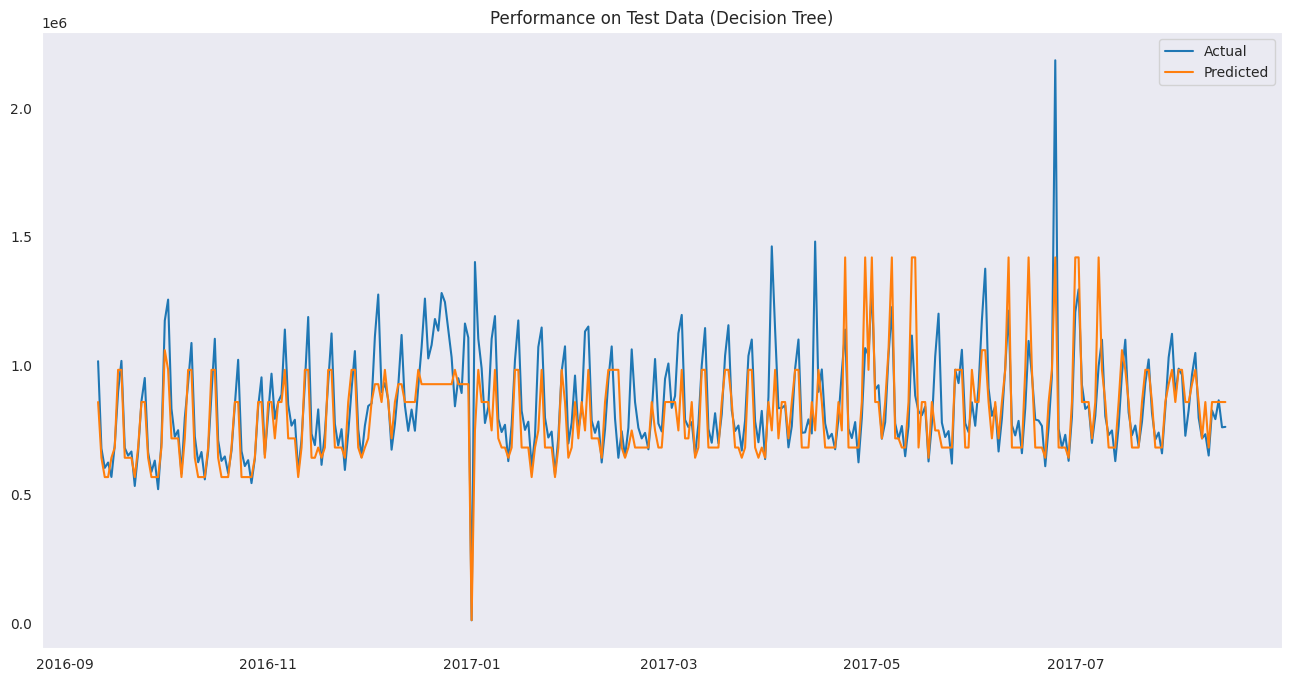

In [180]:
plt.figure(figsize = (16, 8))
plt.plot(dt_df.date[1357:], y_test, label = "Actual")
plt.plot(dt_df.date[1357:], y_pred, label = "Predicted")
plt.legend()

plt.title("Performance on Test Data (Decision Tree)")

Although the Decision Tree is not accurately predicting sudden spikes, it is much better at predicting the overall sales throughout.

***
<center style="color:#2a9d8f"><h3>Using Random Forest</h3></center>

***

Random Forest is an ensemble machine learning algorithm which utilizes decision trees to increase model performance.

In [171]:
# Defining the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Createing RandomForestRegressor object
tree_regressor = RandomForestRegressor(random_state = 36)

# Custom Scorer for RMSLE
rmsle_scorer = make_scorer(root_mean_squared_log_error, greater_is_better = False)

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=tree_regressor, param_grid=param_grid, scoring=rmsle_scorer, cv = 5)

# Fitting the model
grid_search.fit(X_train, y_train)

# The best model from GridSearchCV
best_tree_model = grid_search.best_estimator_

# Fitting with the best estimators
best_rf_model = best_tree_model.fit(X_train, y_train)

# Predictions on test data
y_pred = best_rf_model.predict(X_test)

In [178]:
# Evaluating the model
rf_metrics = calculate_metrics(y_pred, y_test)
print('Evaluation of Decision Tree \n\n', rf_metrics)

Evaluation of Decision Tree 

 {'MAE': 94634.36374479427, 'MSE': 17327325458.853527, 'RMSE': 131633.29920219094, 'RMSLE': 0.1758025350529993}


Text(0.5, 1.0, 'Performance on Test Data Random Forest)')

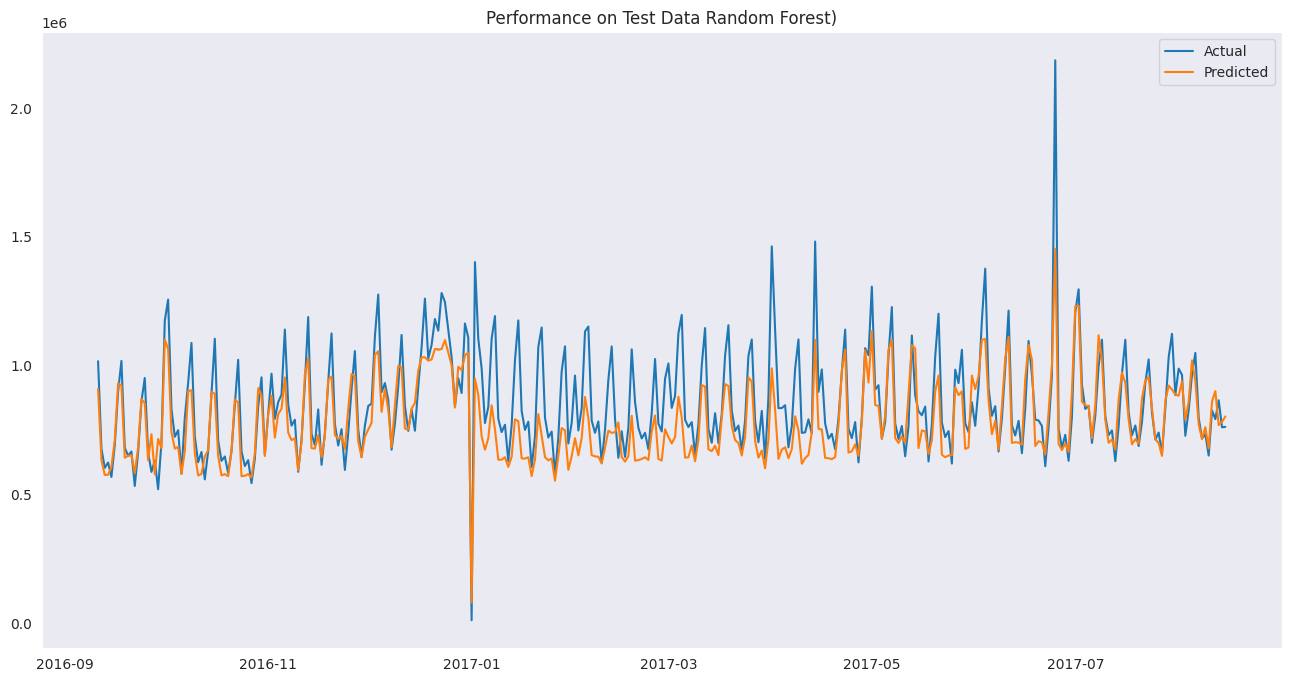

In [177]:
plt.figure(figsize = (16, 8))
plt.plot(dt_df.date[1357:], y_test, label = "Actual")
plt.plot(dt_df.date[1357:], y_pred, label = "Predicted")
plt.legend()

plt.title("Performance on Test Data Random Forest)")

Our random forest model has performed a little bit worse than the decision tree.

In [173]:
# Adding performance to metrics dataframe
rf_metrics.update({'Model': 'Random Forest', 'AIC': 'NA'})
rf_metrics = pd.DataFrame([rf_metrics], columns = ['Model', 'MAE', 'MSE', 'RMSE', 'RMSLE', 'AIC'])
metrics_df = pd.concat([metrics_df, rf_metrics.head(1)]).reset_index(drop = True)
metrics_df

Model            MAE           MSE  \
0  SARIMA(5, 1, 7) x (5, 1, 7, 12)  120251.549561  3.548994e+10   
1                    ARIMA 5, 1, 7  128670.451463  4.147424e+10   
2            Prophet Multi-Variate   74357.413720  9.121842e+09   
3           Rolling Forecast ARIMA  128937.283782  4.155421e+10   
4                    Decision Tree   95504.212183  2.091705e+10   
5                    Random Forest   94634.363745  1.732733e+10   

            RMSE     RMSLE           AIC  
0  188387.746309  0.296572  33448.189847  
1  203652.261011  0.304170  35679.184222  
2   95508.337092  0.207798            NA  
3  203848.503171  0.304625  44026.855589  
4  144627.288193  0.145057            NA  
5  131633.299202  0.175803            NA

***
<center style="color:#2a9d8f"><h3>Final Results</h3></center>

***


In [174]:
metrics_df = metrics_df.sort_values(by = ['RMSLE'], ascending = True)
metrics_df

Model            MAE           MSE  \
4                    Decision Tree   95504.212183  2.091705e+10   
5                    Random Forest   94634.363745  1.732733e+10   
2            Prophet Multi-Variate   74357.413720  9.121842e+09   
0  SARIMA(5, 1, 7) x (5, 1, 7, 12)  120251.549561  3.548994e+10   
1                    ARIMA 5, 1, 7  128670.451463  4.147424e+10   
3           Rolling Forecast ARIMA  128937.283782  4.155421e+10   

            RMSE     RMSLE           AIC  
4  144627.288193  0.145057            NA  
5  131633.299202  0.175803            NA  
2   95508.337092  0.207798            NA  
0  188387.746309  0.296572  33448.189847  
1  203652.261011  0.304170  35679.184222  
3  203848.503171  0.304625  44026.855589

Out of all the algorithms, Decision Tree has performed the best and gives better results than the others.

Since our data contains some sudden spikes, it is advisable to use RMSLE as evaluation metric because it is more robust to presence of outliers.

In [176]:
# Predictions and Actuals on Train Set

y_train = y_train.reset_index(drop = True)
predictions_train = pd.Series(best_dt_model.predict(X_train))

train_results_df = pd.DataFrame({"Actual": y_train.apply("{:.3f}".format), "Predictions": predictions_train})
train_results_df.head(15)

Actual    Predictions
0     2511.619  124878.654997
1   496092.418  506782.663471
2   361461.231  358329.260674
3   354459.677  358329.260674
4   477350.121  506782.663471
5   519695.401  506782.663471
6   336122.801  312877.226342
7   318347.778  312877.226342
8   302530.809  312877.226342
9   258982.003  312877.226342
10  289737.685  312877.226342
11  403258.212  455724.151941
12  464638.548  455724.151941
13  293348.362  312877.226342
14  299129.550  312877.226342

In [175]:
# Predictions and Actuals on Test Set

y_test = y_test.reset_index(drop = True)
predictions_test = pd.Series(best_dt_model.predict(X_test))

test_results_df = pd.DataFrame({"Actual": y_test.apply("{:.3f}".format), "Predictions": predictions_test})
test_results_df.head(15)

Actual    Predictions
0   1017369.224  859021.986726
1    678776.459  642735.261713
2    603427.947  567769.274307
3    624262.072  567769.274307
4    568324.813  642735.261713
5    691912.601  682404.761117
6    899219.298  983980.415057
7   1018662.657  983980.415057
8    681159.342  642735.261713
9    650980.322  642735.261713
10   666928.400  642735.261713
11   533276.332  567769.274307
12   663685.985  682404.761117
13   861830.390  859021.986726
14   952352.551  859021.986726

The model's performance demonstrates a good accuracy in a real-world retail setting, offering valuable insights for optimizing operational aspects such as resource allocation, inventory management, and staffing. The absence of abrupt spikes in predictions further indicates the model's stability. Notably, the predicted values consistently align closely with actual sales figures, showcasing a prediction range within 100,000 units of the observed values. This level of precision provides actionable information for informed decision-making and strategic planning within the retail environment.

***
<a id='future'></a>
<h3 style="text-align: center; background-color: #e07a5f; border-radius: 5px; padding: 7px 5px 7px 5px; margin: 0px;">FUTURE SCOPE</h3>

***

Algorithms with more precise hyperparameters were left untested due to time constraint and huge resource requirement. There were times when there was an issue of Memory Limit on Collab.

These notebook can be build upon with other algorithms for more better accuracy.

Some algorithms to try out:
1. **SARIMA** with Seasonal Value of 365 and other combinations of P, D and Q.
2. **SARIMAX** where the other features of the dataset can be used as exogenous regressors.
3. **LSTM** which are famous for time-series forecasting.
4. **NeuralProphet** - A framework that utilizes deep learning with FaceBook Prophet for better performance.

One can also utilize specialized time series frameworks like Darts, ThymeBoost, LGBM for efficiency, less code and improved performance (if possible).

There are also areas of improvement on Feature Engineering where one can use Sine and Cosine signals of TimeStamp (Day, Week, etc) for additional features.
Various different approaches such as scaling data, removing or adding additional features can also be performed.


***
<a id='references'></a>
<h3 style="text-align: center; background-color: #e07a5f; border-radius: 5px; padding: 7px 5px 7px 5px; margin: 0px;">REFERENCES</h3>

***

1. [Arima for Time Series](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)
2. [Time Series Analysis and Forecasting](https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/)
3. [Time Series Forecasting Cheatsheet](https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/)
4. Youtube Videos on ARIMA, SARIMA and Stationarity Tests.
5. Python, sklearn, Tensorflow, Keras Documentation (Excellent Source of Coding Information).
6. [How to choose the right forecasting technique | Article](https://hbr.org/1971/07/how-to-choose-the-right-forecasting-technique)
7. [Business Forecasting Using Historical Data and Regression Anlaysis](https://smallbusiness.chron.com/business-forecasting-using-historical-data-regression-anlaysis-32844.html)


